<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.520 - Minería de textos</p>
<p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Procesamiento y análisis de información textual (PRA1)

En la PRA1 trabajaremos con un dataset de reseñas (opiniones o reviews) y lo analizaremos siguiendo un conjunto de tareas: pasando por la preparación y limpieza de los datos, hasta la evaluación de modelos de clasificación de sentimientos. Por lo tanto, los objetivos de esta actividad son:

- Aplicar técnicas de procesamiento de lenguaje natural para limpiar y preprocesar los datos del dataset elegido.
- Implementar algoritmos de aprendizaje automático, como LDA y clasificación supervisada, para analizar los textos de las reseñas.
- Evaluar el rendimiento de los modelos creados, utilizando las métricas adecuadas

Por tanto, en esta primera práctica, revisaremos y aplicaremos los conocimientos aprendidos en los módulos 2, 3 y 4 de la asignatura. Concretamente trataremos 5 temas.

<ul>
<li>1. Elección y preparación del dataset (10%).
<li>2. Obtención de datos (30%).
<li>3. Detección de temas (30%).
<li>4. Clasificación automática de opiniones positivas y negativas (20%).
<li>5. Evaluación (10%).
</ul>
  
A continuación, se describe la estructura de la práctica a realizar. Considerar que por cada apartado, se han planteado varios ejercicios a resolver; y en algunos pocos casos, se deja la solución para orientar un poco mejor el desarrollo.

In [ ]:
#!pip3 install kaggle
#!pip3 install pyspellchecker tqdm
#!pip3 install contractions
#!pip3 install seaborn
#!pip3 install gensim
#!pip3 install pyLDAvis
#Instalar la versión pandas 1.5.3 si usas Google Colab como entorno de ejecución.
#!pip install pandas==1.5.3
#!pip install wordcloud

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from spellchecker import SpellChecker
from tqdm import tqdm
import contractions

import nltk
#nltk.download('all')
from nltk import pos_tag, word_tokenize
from nltk.collocations import *

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder, TrigramCollocationFinder
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

from gensim.models import Phrases
from gensim.models.phrases import Phraser

from nltk.util import ngrams
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn
from gensim.models import Word2Vec

from gensim.models import CoherenceModel

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
import numpy as np
import textwrap

from gensim import corpora

from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from wordcloud import WordCloud

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# 1. Elección y preparación del dataset


## 1.1. Descripción y carga del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.1:</strong> En palabras, describir el título del dataset seleccionado, la dirección original (fuente), y una descripción del mismo.

</div>

Título del dataset seleccionado:
Amazon Books Reviews

Fuente: Kaggle - [Amazon Books Reviews](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews)

Descripción del dataset:
Este conjunto de datos contiene reseñas de libros publicadas en Amazon por usuarios reales. Cada registro incluye el titulo y texto de la opinión escrita por el usuario, junto con información adicional como el título del libro, el nombre del usuario, la puntuación asignada (rating), y otras posibles variables relacionadas con la reseña.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.2:</strong> Carga del dataset y descripción de sus principales características: tamaño, estructura, distribución de clase/rating, distribución de longitudes de texto, exploración preliminar del texto de las opiniones (orientada a descubrir potenciales tareas de limpieza a realizar).

</div>

<b>Importante</b>: En caso de haber elegido un dataset sin una columna que denote el sentimiento de cada texto, pero, sí el rating, en este ejercicio, agregar una nueva columna de sentimiento. Por ejemplo, si tenemos los valores 1 a 5 para rating, podríamos considerar a los valores de 1 y 2, como sentimiento negativo (0), y a los valores 4 y 5 como positivo (1). Por ahora, nos vamos a centrar en la clasificación binaria, por tanto, no es necesario considerar a los valores de sentimiento “neutral” o rating=3




In [ ]:
#############################################
#                 SOLUCIÓN                  #
#############################################

In [11]:
# Configurar la API de Kaggle
os.environ['KAGGLE_USERNAME'] = 'paulaalvarz'
os.environ['KAGGLE_KEY'] = '589d59b84ecb445b3d54d18823644a3b'

# Descargar el dataset
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews

# Descomprimir el archivo
with ZipFile("amazon-books-reviews.zip", 'r') as zip_ref:
    zip_ref.extractall("amazon_books_reviews")

# Cargar el dataset
df = pd.read_csv("amazon_books_reviews/Books_rating.csv")

/Users/belle/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
amazon-books-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [7]:
df.dtypes

Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

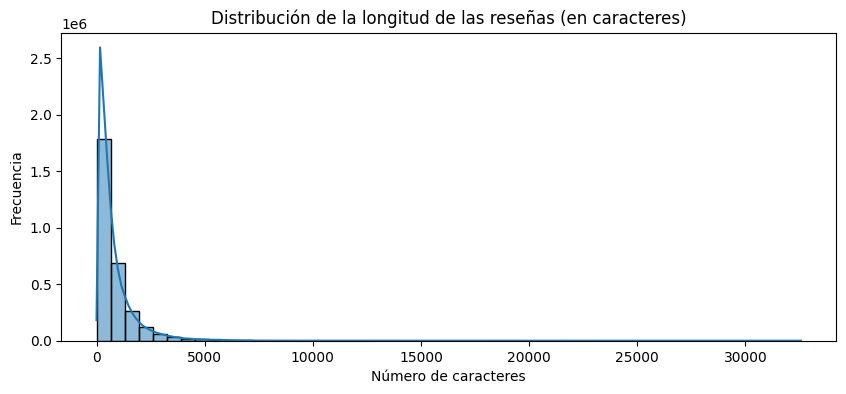

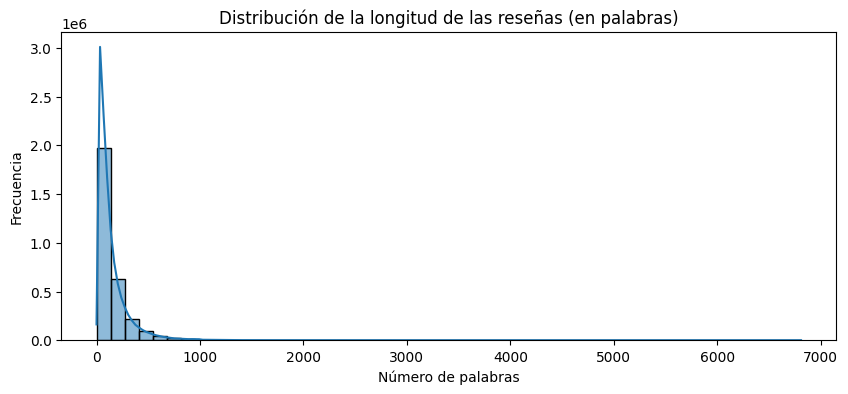

In [4]:
# preprocesado para graficar
plot_df = df.copy()
plot_df['review/text'] = plot_df['review/text'].fillna("").astype(str)
plot_df['num_chars'] = plot_df['review/text'].apply(len)
plot_df['num_words'] = plot_df['review/text'].apply(lambda x: len(x.split()))

# distribución de longitud en caracteres
plt.figure(figsize=(10, 4))
sns.histplot(plot_df['num_chars'], bins=50, kde=True)
plt.title("Distribución de la longitud de las reseñas (en caracteres)")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

# distribución de longitud en palabras
plt.figure(figsize=(10, 4))
sns.histplot(plot_df['num_words'], bins=50, kde=True)
plt.title("Distribución de la longitud de las reseñas (en palabras)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


Los caracteres componen letras, espacios, signos de puntuación etc. mientras que las palabras cuentan aquello que está dividido por espacios por ejemplo:
"Me encantó el libro!" → 20 caracteres || 4 palabras

In [5]:
total = df.shape[0]
count_1_2 = df[df['review/score'].isin([1, 2])].shape[0]
count_3 = df[df['review/score'] == 3].shape[0]
count_4_5 = df[df['review/score'].isin([4, 5])].shape[0]

print(f'El dataframe tiene {total} registros.')
print(f'Reseñas con puntuación 1 o 2 (negativas): {count_1_2},  ({round(count_1_2 / total * 100, 2)}% de los registros)')
print(f'Reseñas con puntuación 3 (neutras): {count_3}, ({round(count_3/total *100, 2)}% de los registros)')
print(f'Reseñas con puntuación 4 o 5 (positivas): {count_4_5}, ({round(count_4_5/total *100, 2)}% de los registros)')

El dataframe tiene 3000000 registros.
Reseñas con puntuación 1 o 2 (negativas): 352746,  (11.76% de los registros)
Reseñas con puntuación 3 (neutras): 254295, (8.48% de los registros)
Reseñas con puntuación 4 o 5 (positivas): 2392959, (79.77% de los registros)


Como se puede observar, el dataset está desbalanceado: hay muchas más reseñas positivas que negativas.

Una posible solución sería considerar las reseñas con puntuación igual a 3 como negativas. Sin embargo, esto podría generar ambigüedad en el modelo, ya que las reseñas con puntuación 3 probablemente no sean tan claramente negativas como aquellas con puntuación 1 o 2.

Dado que el dataset cuenta con una gran cantidad de registros —incluso más de los necesarios, lo que podría afectar negativamente los tiempos de ejecución—, optaremos por reducir el número de reseñas positivas. De esta manera, obtendremos un conjunto de datos más ligero y equilibrado.

In [ ]:
# descartamos los registros con rating 3
df = df[df['review/score'].isin([1, 2, 4, 5])]

# creamos la columna 'feeling' que representa el sentimiento positivo/negativo
df['feeling'] = df['review/score'].apply(lambda x: 0 if x in [1., 2.] else 1)

In [10]:
# reducimos el tamaño del dataset
# seleccionamos 10,000 reseñas negativas (feeling = 0)
negativas = df[df['feeling'] == 0].sample(n=5000, random_state=42)

# seleccionamos 10,000 reseñas positivas (feeling = 1)
positivas = df[df['feeling'] == 1].sample(n=5000, random_state=42)

# unimos ambas muestras
df = pd.concat([negativas, positivas]).sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,feeling
0,069452607X,Good to Great,26.95,AUYL5G0TFOLOH,Lane Coonrod,0/0,5.0,1267660800,good book,good material. I like the concept of the study...,1
1,B000NSK0WC,Introduction to Solid State Physics,NaN,A25EISBHF55C4O,green,2/2,2.0,1216598400,Generations of solid state students suffered,"Generations of solid state physics students, i...",0
2,0738702757,"Sticks, Stones, Roots & Bones: Hoodoo, Mojo & ...",11.50,A31GZ2FFI3OUFU,"Jeffrey Bunting ""Jeff""",5/12,2.0,1179187200,murky at best sexist at worse,First off when I bought this book I had a lot ...,0
3,B000K19KMI,The Cyberiad,NaN,ANTGGAQYPSWHF,"owookiee ""owookiee""",3/34,1.0,1216080000,Hugely disappointing,"This book received such great reviews, but I f...",0
4,0974521272,Leaving Lancaster County,NaN,A2BYXWQ8V5DB70,Judy Wiebe,5/17,1.0,1159833600,very Disappointed,I am fascinated by the Amish and read every bo...,0


In [8]:
total = df.shape[0]
count_1_2 = df[df['review/score'].isin([1, 2])].shape[0]
count_3 = df[df['review/score'] == 3].shape[0]
count_4_5 = df[df['review/score'].isin([4, 5])].shape[0]

print(f'El dataframe tiene {total} registros.')
print(f'Reseñas con puntuación 1 o 2 (negativas): {count_1_2},  ({round(count_1_2 / total * 100, 2)}% de los registros)')
print(f'Reseñas con puntuación 3 (neutras): {count_3}, ({round(count_3/total *100, 2)}% de los registros)')
print(f'Reseñas con puntuación 4 o 5 (positivas): {count_4_5}, ({round(count_4_5/total *100, 2)}% de los registros)')

El dataframe tiene 10000 registros.
Reseñas con puntuación 1 o 2 (negativas): 5000,  (50.0% de los registros)
Reseñas con puntuación 3 (neutras): 0, (0.0% de los registros)
Reseñas con puntuación 4 o 5 (positivas): 5000, (50.0% de los registros)


## 1.2 Limpieza de texto

Antes de trabajar con los textos de las reseñas, hay que limpiarlos. En general, dependiendo del dataset podría ser necesario:

1. Eliminar menciones (@), hashtags (#), o código HTML.
2. Eliminar páginas web.
3. Corregir palabras mal escritas (las que resalten en el corpus).
4. Eliminar duplicados.
5. Convertir contracciones, (por ejemplo, en lugar de wouldn't, se cambiaría a would not).
6. Filtrar tokens no alfabéticos.
7. Filtrar signos de puntuación (!) y quitar espacios doble. Se recomienda no quitar el "." porque luego se usará este signo para crear la lista de sentencias. Como referencia ver el ejemplo de PRA proporcionado (*Ejemplo_PRA1.ipynb*).
9. Convertir texto a minúsculas.

Por cada punto, realizar las verificaciones necesarias para determinar la existencia de cada elemento mencionado en el punto anterior (menciones, hashtags, código HTML, páginas web, etc.) e implementar las acciones de limpieza (según se requiera).

<b>IMPORTANTE</b>:
- Antes de implementar cualquier acción, se sugiere crear una columna, llamada *text*, a partir del contenido de la columna de texto original del datset elegido; y sobre la nueva columna aplicar las tareas de limpieza.
- Por cada acción de limpieza realizada, enlistar al menos una reseña que muestre que la función implementada funciona. Es decir, presentar el texto original y el texto transformado (*text*).
- Agregar las celdas de texto y código necesarias, de tal manera que se realice las verificaciones sugeridas, y se dé solución a los problemas de calidad de datos encontrados. Como orientación, se recomienda revisar el archivo <b>Ejemplo_PRA1.ipynb</b> para ver la mejor forma de organanizar la solución.

In [12]:
#Crear la columna 'text' para aplicar en ella las tareas de preprocesamiento y limpieza:
df['text'] = df['review/text']

In [10]:
#############################################
#                 SOLUCIÓN
#############################################

In [13]:
def show_and_clean(pattern_name, pattern, df, column='text', replacement=''):

    """
    Funcion que busca las coincidencias para un patrón, muestra el texto,
    lo limpia y muestra el resultado.
    """
    # compilamos para ahorrar tiempo de ejecucion 
    pattern = re.compile(pattern)

    # buscamos coincidencias
    matches = df[df[column].str.contains(pattern, na=False)]

    if not matches.empty:
        # mostramos ejemplo antes
        idx = matches.index[0]
        print(f"Ejemplo antes ({pattern_name}):")
        print(df.loc[idx, column])

        # limpiamos
        df[column] = df[column].apply(lambda x: re.sub(pattern, replacement, str(x)))

        # mostramos ejemplo después
        print(f"Ejemplo después de eliminar {pattern_name}:")
        print(df.loc[idx, column])
        print("─────────────────────────────────────────────\n")
    else:
        print(f"No se encontraron ejemplos con {pattern_name}.\n")

### 1. Eliminar menciones (@), hashtags (#), o código HTML.

In [14]:
show_and_clean("mención", r'@\w+', df) 
show_and_clean("hashtag", r'#\w+', df)
show_and_clean("HTML", r'<.*?>', df)

Ejemplo antes (mención):
I first encountered Bob Kane's skill with the daedal discipline of free will in his book *The Significance of Free Will.* At that time, I realized that Kane had an almost suspicious talent for articulating my own objections, and then articulating a response that would often satisfy me more than my own.While such a talent may be a bit threatening for readers aiming to claim their own victories, Kane's affability and enthusiasm always leave the reader not only with the necessary knowledge, but with a sense of pride in having participated in his well-authenticated jaunts.This work, in particular, highlights Kane's skills as both an original author and an editor with an honest eye for the best arguments of his opponents. It will certainly become a staple, if it has not already, for professional scholars of free will and curious by-standers alike. The *Oxford Handbook of Free Will* draws together balanced selections from the most relevant authors in the field, and-d

### Paso adicional: eliminar direcciones de correo

En el paso anterior pudimos comprobar que había una direccion de correo elecronico, esto no aporta valor a nuestro modelo así que podemos eliminarlos también

A continuación eliminaremos dominios y direcciones de correo

In [15]:
show_and_clean("dominios", r'\S*\.(com|net|org|es|co|edu|gov)\b', df)
show_and_clean("direcciones de correo", r'\b\S*(gmail|hotmail|yahoo)\S*\b', df)

/var/folders/x8/8kqsdc8s6txfbp4y2y7hk8br0000gn/T/ipykernel_1134/3839851707.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df[df[column].str.contains(pattern, na=False)]


Ejemplo antes (dominios):
I first encountered Bob Kane's skill with the daedal discipline of free will in his book *The Significance of Free Will.* At that time, I realized that Kane had an almost suspicious talent for articulating my own objections, and then articulating a response that would often satisfy me more than my own.While such a talent may be a bit threatening for readers aiming to claim their own victories, Kane's affability and enthusiasm always leave the reader not only with the necessary knowledge, but with a sense of pride in having participated in his well-authenticated jaunts.This work, in particular, highlights Kane's skills as both an original author and an editor with an honest eye for the best arguments of his opponents. It will certainly become a staple, if it has not already, for professional scholars of free will and curious by-standers alike. The *Oxford Handbook of Free Will* draws together balanced selections from the most relevant authors in the field, and-

### 2. Eliminar páginas web

In [16]:
show_and_clean("paginas web", r'http[s]?://\S+', df)

Ejemplo antes (paginas web):
this is the story of what happened to one little boy,who was kidnapped from a loving family in the Sudan, and forced to become a slave at age seven. He remained a slave, untill he finally escpaed ten years later.It did not happen hundreds of years ago. It happenned thirteen years ago.Its written in a gentle voice, but one that conveys the tragedy well.It NEEDS to be read, NOW.Please, if you are a human being, and feel that slavery is wrong and kidnapping is wrong, then read this.I have also been going through the website that Francis Bok is attached to and am learning a great dealhttp://www.iabolish.comDear Francis Bok, if youre reading this&gt; youre a good man and a tribute to the human spirit. A good son.
Ejemplo después de eliminar paginas web:
this is the story of what happened to one little boy,who was kidnapped from a loving family in the Sudan, and forced to become a slave at age seven. He remained a slave, untill he finally escpaed ten years later.

### 3. Corregir palabras mal escritas (las que resalten en el corpus)

In [ ]:
# Inicializar spellchecker
spell = SpellChecker()

# Asegurar que tqdm funcione bien con pandas apply
tqdm.pandas()

# Función que corrige palabra por palabra conservando puntuación
def correct_spelling_with_punctuation(text):
    # Separar palabras y puntuación
    words = re.findall(r'\w+|[^\w\s]', text, re.UNICODE)
    corrected = []

    for word in words:
        if word.isalpha():
            corrected_word = spell.correction(word)
            corrected.append(corrected_word if corrected_word else word)
        else:
            corrected.append(word)

    # Reconstruir el texto
    return ' '.join(corrected).replace(" .", ".")

# Aplicar corrección con barra de progreso
df['text'] = df['text'].progress_apply(correct_spelling_with_punctuation)


100%|██████████| 10000/10000 [49:17<00:00,  3.38it/s]  


In [30]:
for i, row in df[['review/text', 'text']].head(5).iterrows():
    print(f"Original: {row['review/text']}")
    print(f"Corregido: {row['text']}")
    print("─────────────────────────────")

Original: good material. I like the concept of the study. Might not change your life, but might change your way of thinking
Corregido: good material. I like the concept of the study. Might not change your life , but might change your way of thinking
─────────────────────────────
Original: Generations of solid state physics students, including myself, have been brought up using this text by Kittel. I have also taught from this text numerous times. Poor, poor students! The text "contains" all the requisite material, but its explanations are murky and it it slips major concepts by without making them clear. I have resolved never again to make my students suffer with this text. Ashcroft & Mermin is wonderful book, but too advance as an introductory text. Bube's little book, Electrons in Solids, is a delight but too expensive for students and a little bit too elementary. Despite their limitations, I'm going to use the combination of those from now on.
Corregido: Generations of solid state p

### 4. Eliminar duplicados

In [31]:
# contar cuántas veces aparece cada texto
conteos = df['text'].value_counts()

# textos que aparecen más de una vez
duplicados_reales = conteos[conteos > 1]

if not duplicados_reales.empty:
    # seleccionar uno como ej
    texto = duplicados_reales.index[0]

    print('texto duplicado')
    print(texto)

    print('\nFilas que lo contienen:')
    print(df[df['text'] == texto][['text']])

texto duplicado
mob Dick is a classic.... a book that you ' d have to have lived in a cave on a remote island for your entire life to have not at least heard the name of. The book has sat on my bookshelf , as part of a series of classic novels I had been given , for some time now. I always knew that ' someday ' I ' d open it and read it... being one of those ' I really should read it at some point ' books. Apparently I enjoyed this book a lot less than many others who have read it and reviewed it here.... because I have to admit that it is one of the most dry , turgid , tedious experiences I have ever had to wade through this book , and it ' s under 500 pages long. Perhaps what deterred me from enjoying it was the endless chapters that provide detailed descriptions of the size of a whale ' s head.... or the length of a whale ' s tail.... or the distance from a whale ' s head to its tail..... chapter upon chapter upon chapter that did nothing to move the story along , did nothing to fle

In [32]:
print('nº de registros antes de eliminar duplicados:', len(df))
df = df.drop_duplicates(subset='text', keep='first')
print('nº de registros despues de eliminar duplicados:', len(df))

nº de registros antes de eliminar duplicados: 10000
nº de registros despues de eliminar duplicados: 9919


### 5. Contracciones

In [33]:
def expand_contractions(text):
    return contractions.fix(text)

# Aplicar expansión de contracciones
df['text'] = df['text'].apply(expand_contractions)

/var/folders/x8/8kqsdc8s6txfbp4y2y7hk8br0000gn/T/ipykernel_4966/218569697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(expand_contractions)


In [34]:
a = "I wouldn't recommend this book because it didn't meet my expectations. It's not what I thought it'd be."
b = expand_contractions(a)
print('Ejemplo de texto antes de la corrección:', a)
print('Ejemplo de texto después de la corrección:', b)

Ejemplo de texto antes de la corrección: I wouldn't recommend this book because it didn't meet my expectations. It's not what I thought it'd be.
Ejemplo de texto después de la corrección: I would not recommend this book because it did not meet my expectations. It is not what I thought it would be.


### 6. Tokens no alfabeticos

In [168]:
print("Original:")
print(df.iloc[4]['text'])

# compilamos la expresion para reducir el tiempo de ejecucion 
non_alpha_re = re.compile(r'[^a-zA-Z.]')

def remove_non_alpha_tokens(text):
    if not isinstance(text, str):
        return ""

    tokens = text.split()
    cleaned_tokens = []

    for token in tokens:
        # Detectar si el token termina en punto
        if token.endswith('.') and token[:-1].isalpha():
            cleaned_tokens.append(token[:-1])   # palabra limpia
            cleaned_tokens.append('.')          # mantener el punto separado
        elif token.isalpha():
            cleaned_tokens.append(token)
        else:
            # Limpiar otros símbolos
            stripped = re.sub(r'[^a-zA-Z]', '', token)
            if stripped.isalpha():
                cleaned_tokens.append(stripped)

    return ' '.join(cleaned_tokens)


df['text'] = df['text'].apply(remove_non_alpha_tokens)#show_and_clean("espacios dobles", r'\s+', df)

print("Corregido:")
print(df.iloc[4]['text'])

Original:
I am fascinated by the Amish and read every book on this topic I can germy hands on. I did not finish " Leaving Lancaster County ". The typos , misused words , and bad sentence structure were just more than I could take. Anyone want to read it ? ? ? ? You can have my copy for free ! ! Judy W
Corregido:
I am fascinated by the Amish and read every book on this topic I can germy hands on . I did not finish Leaving Lancaster County The typos misused words and bad sentence structure were just more than I could take . Anyone want to read it You can have my copy for free Judy W


### 7. Signos de Puntuacion (excepto el punto)

In [169]:
print("Original:")
original = df['text'].iloc[4]
print(original)

Original:
I am fascinated by the Amish and read every book on this topic I can germy hands on . I did not finish Leaving Lancaster County The typos misused words and bad sentence structure were just more than I could take . Anyone want to read it You can have my copy for free Judy W


In [165]:
# Lista de signos que queremos eliminar (todos excepto el punto)
signs_to_remove = set(string.punctuation.replace('.', ''))

def remove_standalone_punctuation(text):
    if not isinstance(text, str):
        return ""

    tokens = text.split()
    cleaned = [token for token in tokens if token not in signs_to_remove]
    return ' '.join(cleaned)


df['text'] = df['text'].apply(remove_standalone_punctuation)


In [170]:
print("\nCorregido:")
corrected = df['text'].iloc[4]
print(corrected)


Corregido:
I am fascinated by the Amish and read every book on this topic I can germy hands on . I did not finish Leaving Lancaster County The typos misused words and bad sentence structure were just more than I could take . Anyone want to read it You can have my copy for free Judy W


### 8. Texto a minusculas

In [171]:
print("Original:")
original = df['text'].iloc[5]
print(original)

Original:
What an awesome book So much detail and insight into the spirit world . It gives amazing hope for this life past lives and lives yet to come . The characters are so vibrant and intertwine in a captivating story


In [172]:
df['text'] = df['text'].fillna("").str.lower()

In [173]:
print("\nCorregido:")
corrected = df['text'].iloc[5]
print(corrected)


Corregido:
what an awesome book so much detail and insight into the spirit world . it gives amazing hope for this life past lives and lives yet to come . the characters are so vibrant and intertwine in a captivating story


In [174]:
df.to_csv('df_preprocesado.csv', index=False)

Para tener una visión general del resultado de la limpieza del texto podemos comparar la columna original con la resultante de nuestro preprocesado:

In [189]:
for _, row in df[['review/text', 'text']].head(8).iterrows():
    print(row['review/text'])
    print(row['text'], '\n')

good material. I like the concept of the study. Might not change your life, but might change your way of thinking
good material . i like the concept of the study . might not change your life but might change your way of thinking 

Generations of solid state physics students, including myself, have been brought up using this text by Kittel. I have also taught from this text numerous times. Poor, poor students! The text "contains" all the requisite material, but its explanations are murky and it it slips major concepts by without making them clear. I have resolved never again to make my students suffer with this text. Ashcroft & Mermin is wonderful book, but too advance as an introductory text. Bube's little book, Electrons in Solids, is a delight but too expensive for students and a little bit too elementary. Despite their limitations, I'm going to use the combination of those from now on.
generations of solid state physics students including myself have been brought up using this text 

# 2. Obtención de datos

En esta parte analizaremos el texto, *encontraremos el conjunto de términos multipalabra relevantes del dataset y analizaremos el objeto y aspectos de las opiniones* del texto utilizando el modelo Word2Wec. Para ello empezaremos calculando los **mejores bigramas y trigramas de las opiniones del dataset y evaluarlos** según distintas métricas (PMI y Likehood). Posteriormente, detectaremos los **n-gramas que cumplan un patrón sintáctico de un sintagma nominal** (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural) y, terminaremos **detectando colocaciones** con un modelo de detección de frases, por ejemplo con el módulo Phraser de Gensim. Una vez analizados los terminos multiplalabra, **crearemos un modelo word2vec** con las opiniones lematizadas y lo utilizaremos para analizar los targets de las opiniones.


In [187]:
df = pd.read_csv('df_preprocesado.csv')

In [21]:
#Importar la lista de stopwords en el idioma de los *reviews* de la libreria NLTK y agregamos algunas adicionales:
stopwords =  ["would"]
stopwords = stopwords + nltk.corpus.stopwords.words('english')
stopwords[:15] # extracto de stopwords.

['would',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren']

### 2.1. Detección de colocaciones

Las colocaciones son términos multipalabra, es decir, secuencias de palabras que, en conjunto, tienen un significado que difiere significativamente del significado de cada palabra individual (e.g."free version").

#### 2.1.1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.1:</strong> Calcular los mejores bigramas y trigramas de las opiniones. De los mejores bigramas y trigramas, elige a los que no comienzan, ni terminan con una stopword.
<br>
<b>Salida esperada:</b> Imprimir los primeros 20 n-grams obtenidos con cada métrica.
</div>
<br>
<b>Pasos a realizar</b>:

-  Obtener los tokens del texto de las opiniones y etiquetarlos por su PoS
-   Aplicar las métricas PMI y Likehood Ratio para calcular los mejores bigramas y los mejores trigramas a partir de los tokens etiquetad ylos que no comcenzan ni terennan con una stopword.

##### 2.1.1.1

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Primer paso</i>: Obtener los tokens del texto de las reseñas. Etiqueta estos tokens por su PoS.

Utiliza los métodos *word_tokenize* para tokenizar el texto de las reseñas y  *pos_tag* para determinar la etiqueta de cada token.
<br>
<b>Salida esperada:</b> Imprime los diez primeros tokens, con su respectiva etiqueta:
</div>
<br>
Antes de categorizar a los tokens por su tag POS, primero vamos a convertir el texto a minúsculas:

In [22]:
#Creamos texto en minúscula que recoja todas las reseñas.
#En las siguientes líneas df es el dataframe donde se cargó el dataset, y text es la columna que tiene el texto preprocesado.
#Se sugiere actualizar la siguiente línea con los objetos propios y correr las instrucciones.
#opinions = " ".join(df['text']).lower()
#opinions[:250]

In [23]:
#############################################
# SOLUCIÓN PASO 1                           #
#############################################

# 1. Unir todas las reseñas y convertir a minúsculas
opinions = " ".join(df['text'].dropna()).lower()
print("Reseñas unidas y en minúscula:")
print(opinions[:100])

# 2. Tokenizar
tokens = word_tokenize(opinions)
print("Tokens:")
print(tokens[:10])

# 3. Etiquetar con PoS
tokens_pos = pos_tag(tokens)
print("Tokens PoS:")
print(tokens_pos[:10])


Reseñas unidas y en minúscula:
good material . i like the concept of the study . might not change your life but might change your w
Tokens:
['good', 'material', '.', 'i', 'like', 'the', 'concept', 'of', 'the', 'study']
Tokens PoS:
[('good', 'JJ'), ('material', 'NN'), ('.', '.'), ('i', 'NN'), ('like', 'IN'), ('the', 'DT'), ('concept', 'NN'), ('of', 'IN'), ('the', 'DT'), ('study', 'NN')]


##### 2.1.1.2


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Segundo paso</i>: Calcular los 300 mejores bigramas y los 300 mejores trigramas a partir de los tokens etiquetados (e.g. [(we, PRP), ...]) del texto. Utiliza las métricas PMI y Likehood Ratio.
<br>
<b>Condición</b>: De la lista de mejores bigramas y trigramas, elige a los que no comienzan ni terminen con una stopword. Para el filtrado de stopwords considera:
- La lista previamente cargada (desde el paquete NLTK), y
- Las categorías POS que representan a palabras vacías como determinantes, preposiciones, entre otras.
<br>
<b>Salida esperada:</b> Imprime los primeros 20 n-grams obtenidos con cada métrica.
</div>
  

Recordemos la clasificación de etiquetas PoS.

<b>Etiquetas PoS</b>

<ul>
<li>DT: Determinante</li>
<li>JJ: Adjetivo</li>
<li>NN: Nombre en singular</li>
<li>NNS: Nombre en plural</li>
<li>VBD: Verbo en pasado</li>
<li>VBG: Verbo en gerundio</li>
<li>MD: Verbo modal</li>
<li>IN: Preposición o conjunción subordinada</li>
<li>PRP: Pronombre</li>
<li>RB: Adverbio</li>
<li>RP: Partícula</li>    
<li>CC: Conjunción coordinada</li>
<li>CD: Numeral</li>
</ul>

In [35]:
# métricas para el cálculo de bigramas y trigramas:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#############################################
# SOLUCIÓN PASO 2                           #
#############################################

ngrams_num = 300

# convertimos las stopwords de lista a conjunto (set)
# en python in es más rápido con set que con list (O(1) vs O(n))
stopwords_set = set(stopwords.words('english'))

# etiquetas PoS a considerar como palabras vacías
pos_stopwords = {'DT', 'IN', 'PRP', 'CC', 'MD', 'RP' '.'}

# ================================
# FILTRADO DE NGRAMS
# ================================
punctuation = set(string.punctuation)

def is_valid_ngram(ngram):
    # ngram: lista de tuplas [(word1, tag1), (word2, tag2)] o trigram
    first_word, first_tag = ngram[0]
    last_word, last_tag = ngram[-1]
    
    # revisamos que el primer y ultimo elemento:
    # - no sean stopwords
    # - no tengan PoS vacía 
    # - no sean signos de puntuación

    if (first_word in stopwords_set or first_tag in pos_stopwords or first_word in punctuation or
        last_word in stopwords_set or last_tag in pos_stopwords or last_word in punctuation):
        return False
    
    for word, tag in ngram:
        if word in punctuation:
            return False
    
    return True
# ================================
# ENTRADA: lista de tokens POS-tagged
# ================================
# tokens_pos generado en paso 1

# extraemos solo las palabras para usar en el finder
words = [word for word, tag in tokens_pos]

# Bigramas
bigram_measures = BigramAssocMeasures()
finder_bigram = BigramCollocationFinder.from_words(words)
bigrams_pmi = finder_bigram.nbest(bigram_measures.pmi, ngrams_num)
bigrams_lr = finder_bigram.nbest(bigram_measures.likelihood_ratio, ngrams_num)

# Trigramas
trigram_measures = TrigramAssocMeasures()
finder_trigram = TrigramCollocationFinder.from_words(words)
trigrams_pmi = finder_trigram.nbest(trigram_measures.pmi, ngrams_num)
trigrams_lr = finder_trigram.nbest(trigram_measures.likelihood_ratio, ngrams_num)

# ================================
# FILTRADO usando tokens_pos
# ================================
# convertir a bigramas con POS
bigrams_pos = list(nltk.bigrams(tokens_pos))
trigrams_pos = list(nltk.trigrams(tokens_pos))

# versiones limpias
filtered_bigrams_pmi = [
    ng for ng in bigrams_pos 
    if tuple(w for w, _ in ng) in bigrams_pmi and is_valid_ngram(ng)
]

filtered_bigrams_lr = [
    ng for ng in bigrams_pos 
    if tuple(w for w, _ in ng) in bigrams_lr and is_valid_ngram(ng)
]

filtered_trigrams_pmi = [
    ng for ng in trigrams_pos 
    if tuple(w for w, _ in ng) in trigrams_pmi and is_valid_ngram(ng)
]

filtered_trigrams_lr = [
    ng for ng in trigrams_pos 
    if tuple(w for w, _ in ng) in trigrams_lr and is_valid_ngram(ng)
]

# ================================
# RESULTADOS
# ================================
# Bigrams PMI
print("Mejores 20 Bigramas (PMI):")
print(', '.join([' '.join([w for w, t in bg]) for bg in filtered_bigrams_pmi[:20]]))

# Bigrams Likelihood Ratio
print("\nMejores 20 Bigramas (Likelihood Ratio):")
print(', '.join([' '.join([w for w, t in bg]) for bg in filtered_bigrams_lr[:20]]))

# Trigrams PMI
print("\nMejores 20 Trigramas (PMI):")
print(', '.join([' '.join([w for w, t in tg]) for tg in filtered_trigrams_pmi[:20]]))

# Trigrams Likelihood Ratio
print("\nMejores 20 Trigramas (Likelihood Ratio):")
print(', '.join([' '.join([w for w, t in tg]) for tg in filtered_trigrams_lr[:20]]))


Mejores 20 Bigramas (PMI):
samaria caesarea, caesarea antioch, geothermal vents, saldyllic varnish, remora sulu, concordances coordinating, fourteenth amendments, floppies kmemory, saddles harnesses, jackbooted popeye, highland bagpipe, ingres gl, rejoicing empathizing, kristi wysockioctober, senor braulio, nadir steppes, kat headman, scorpions owls, owls magpies, magpies gulls

Mejores 20 Bigramas (Likelihood Ratio):
science fiction, much better, years ago, much better, main character, well written, main character, well written, th century, ever read, much better, high school, well written, ever read, main character, well written, writing style, ever read, highly recommend, high school

Mejores 20 Trigramas (PMI):
samaria caesarea antioch, isaiah ezekiel zech, glias para trabajar, para trabajar foots, velvets springsteen punk, wrestler ditsy blond, swami yukteswar pierces, inch floppies kmemory, cob terri blackstone, harcourt brace jovanovich, brace jovanovich inc, toads snakes scorpi

### 2.1.2

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.1.2:</strong>  Detectar n-gramas que cumplen el patrón sintáctico de un sintagma nominal (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural). Las palabras componentes de cada n-grama deben estar separdaas por un guión "-".
<br>
<b>Salida esperada:</b> Lista de los 20 primeros n-gramas que cumplan el patrón sintáctico especificado, por ejemplo, 'new_york' y 'tourism'.

</div>

Vamos a buscar: 
- adjetivo + nombre -> (JJ, NN/NNS) e.g. "strong coffee"

- nombre + nombre -> (NN/NNS, NN/NNS) e.g. "data analysis"

- nombre + nombre + nombre -> (NN/NNS + NN/NNS + NN/NNS) e.g. "machine learning model"

In [36]:
#############################################
# SOLUCIÓN                                  #
#############################################

# stopwords y puntuación
stopwords_set = set(stopwords.words('english')) 
punctuation_set = set(string.punctuation)

def is_valid_word(word):
    return word.lower() not in stopwords_set and word not in punctuation_set


# 1. generamos bigramas y trigrams con POS
bigrams_pos = list(nltk.bigrams(tokens_pos))
trigrams_pos = list(nltk.trigrams(tokens_pos))

# 2. detectamos bigramas que cumplan con sintagma nominal
def is_noun_phrase_bigram(bigram):
    (w1, t1), (w2, t2) = bigram
    return (
        (t1 == 'JJ' and t2 in ['NN', 'NNS']) or       # adjetivo + nombre
        (t1 in ['NN', 'NNS'] and t2 in ['NN', 'NNS']) # nombre + nombre
    )

# 3. detectamos trigrams nominales (opcionalmente más restrictivos)
def is_noun_phrase_trigram(trigram):
    (w1, t1), (w2, t2), (w3, t3) = trigram
    return (
        t1 in ['NN', 'NNS'] and t2 in ['NN', 'NNS'] and t3 in ['NN', 'NNS']
    )

# 4. filtramos lso n-gramas que cumplen el patrón
noun_phrase_bigrams = [
    '-'.join([w1, w2])
    for (w1, t1), (w2, t2) in bigrams_pos
    if is_noun_phrase_bigram(((w1, t1), (w2, t2)))
    and is_valid_word(w1) and is_valid_word(w2)
]
noun_phrase_trigrams = [
    '-'.join([w1, w2, w3])
    for (w1, t1), (w2, t2), (w3, t3) in trigrams_pos
    if is_noun_phrase_trigram(((w1, t1), (w2, t2), (w3, t3)))
    and is_valid_word(w1) and is_valid_word(w2) and is_valid_word(w3)
]

# 5. resultados
print("Primeros 20 bigramas como sintagmas nominales:")
print(', '.join(noun_phrase_bigrams[:20]))

print("\nPrimeros 20 trigramas como sintagmas nominales:")
print(', '.join(noun_phrase_trigrams[:20]))



Primeros 20 bigramas como sintagmas nominales:
good-material, solid-state, state-physics, physics-students, numerous-times, poor-students, requisite-material, major-concepts, ashcroft-vermin, wonderful-book, introductory-text, little-book, book-electrons, little-bit, high-hopes, view-point, evil-okay, negative-work, austin-powers, mojo-comment

Primeros 20 trigramas como sintagmas nominales:
state-physics-students, blah-blah-blah, planet-arc-king, quit-wave-quit, quit-pseudo-science, quit-experts-quit, quit-biofeedback-community, marathon-man-characters, woman-constance-chatterley, decency-heart-womanhood, heart-womanhood-et, washington-irving-centers, murder-mystery-genre, towards-psychoanalysis-mass, psychoanalysis-mass-production, character-john-savage, honesty-quit-lord, fifth-grade-student, church-history-roman, history-roman-empire


### 2.1.3

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.3:</strong> Detectar colocaciones con un modelo de detección de frases, con el módulo Phraser de Gensim. Entrenar el modelo con todas las opiniones.
<br>
</div>
<br>
<b>Pasos a realizar</b>:

1. Crear la lista de sentences. Tomar como referencia el código comentado que consta en la siguiente celda.
2. Convertir las reseñas  en una lista de phrases. Las phrases no deben ser stopwords. Tampoco deben empezar ni acabar con una stopword.
3. Entrenar el modelo con todas las opiniones.


In [9]:
#Crear la lista de sentences. Las siguientes líneas pueden ser tomadas como referencia
#Actualizar el nombre del dataframe y de la columna del texto pre-procesado.#
#opinions_string = " ".join(df['text'])

#opinion_sentences = opinions_string.split('. ')

#opinion_sentences[:10]


In [40]:
# 1. string con todas las opiniones
opinions_string = " ".join(df['text'].astype(str))

# 2. dividimos por oraciones usando '. ' como separador
opinion_sentences = opinions_string.split('. ')
print("Ejemplo de frases:")
for sentence in opinion_sentences[:10]:
    print(sentence)

# 3. lista de oraciones tokenizadas
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in opinion_sentences]

# 4. filtramos tokens que sean palabras y no stopwords
filtered_sentences = [
    [word for word in sentence if word not in stopwords_set]
    for sentence in tokenized_sentences
]

# 5. entrenamos el modelo de frases
# min_count=n: acepta colocaciones que aparecen al menos n veces
# threshold=n: umbral de bondad. Define cuán asociadas deben estar las palabras
#   Gensim usa una fórmula que mide si es más probable que esas palabras ocurran 
#   juntas por azar o porque forman una unidad semántica.
phrases_model = Phrases(filtered_sentences, min_count=5, threshold=10)
phraser = Phraser(phrases_model)

# 6. aplicamos el modelo para detectar frases
phrased_sentences = phraser[filtered_sentences]

# 7. ver ejemplos
print("\nEjemplos de colocaciones detectadas por Gensim:")
for sent in phrased_sentences[:10]:
    print(sent)

Ejemplo de frases:
good material 
i like the concept of the study 
might not change your life but might change your way of thinking generations of solid state physics students including myself have been brought up using this text by kitten 
i have also taught from this text numerous times 
poor poor students the text contains all the requisite material but its explanations are murky and it it slips major concepts by without making them clear 
i have resolved never again to make my students suffer with this text 
ashcroft vermin is wonderful book but too advance as an introductory text 
tube s little book electrons in solids is a delight but too expensive for students and a little bit too elementary 
despite their limitations i m going to use the combination of those from now on 
first off when i bought this book i had a lot of high hopes for it but upon reading it i found it to be way to water down for me to like it 

Ejemplos de colocaciones detectadas por Gensim:
['good', 'material']

En este ejemplo podemos ver algunas colocaciones detectadas como 'numerous_times', 'little_bit', 'high_hopes'. Estas son expresiones frecuentes en inglés y tienen un sentido conjunto que es más que la suma de sus partes.

Dependiendo de nuestro objetivo podríamos modificar min_count y threshold para capturar más combinaciones raras pero relevantes o ser mas restrictivos. 

### 2.1.4

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Convierte las reseñas en una lista de *phrases*. Las phrases no deben ser stopwords. Tampoco deben empezar, ni terminar con una stopword. Utiliza la lista de stopwords para el filtrado.
<br>
<b> Salida esperada:</b> Lista de las 20 primeras *phrases* que no sean, o no contengan stopwords.

</div>

In [48]:
#############################################
# SOLUCIÓN PASO 2                           #
#############################################

# aplanamos las frases detectadas en una sola lista
all_phrases = [phrase for sentence in phrased_sentences for phrase in sentence]

# filtramos solo aquellas que son "phrases" reales (tienen _)
phrases_only = [phrase for phrase in all_phrases if '_' in phrase]

# ahora filtramos:
#   - que NO sean stopwords completas
#   - que NO empiecen ni terminen con una stopword
filtered_phrases = []
for phrase in phrases_only:
    parts = phrase.split('_')
    if (
        phrase not in stopwords_set and
        parts[0] not in stopwords_set and
        parts[-1] not in stopwords_set
    ):
        filtered_phrases.append(phrase)

# seleccionamos las frases unicas
filtered_phrases = list(dict.fromkeys(filtered_phrases))

# vemos las mas frecuentes
phrase_freq = Counter(filtered_phrases)
print("Top 20 colocaciones por frecuencia:")
print(phrase_freq.most_common(20))


Top 20 colocaciones por frecuencia:
[('numerous_times', 1), ('little_bit', 1), ('high_hopes', 1), ('coming_age', 1), ('blah_blah', 1), ('seemed_like', 1), ('want_learn', 1), ('first_place', 1), ('incredibly_boring', 1), ('let_go', 1), ('telling_story', 1), ('even_though', 1), ('science_fiction', 1), ('much_better', 1), ('pseudo_science', 1), ('put_together', 1), ('self_proclaimed', 1), ('hard_believe', 1), ('feels_like', 1), ('many_people', 1)]


Como se puede observar, la frecuencia de Nuestros colocaciones es muy baja esto es debido a que los filtros que aplicamos para Stock Wards son muy restrictivos y eliminan colocaciones útiles como would_recommend o must_read. A continuación proporciona el código con un filtro más suave y permisivo.

In [51]:
# lista de stopwords permitidas 
stopwords_allowed_as_prefix = {
    'would', 'must', 'should', 'could', 'can',
    'even', 'just', 'still', 'much', 'very', 'so',
    'one', 'all', 'many', 'some', 'such',
    'first', 'more', 'most', 'no', 'never'
}

def is_useful_phrase(phrase):
    parts = phrase.split('_')
    return (
        parts[0] not in stopwords_set or parts[0] in stopwords_allowed_as_prefix
    ) and (
        parts[-1] not in stopwords_set
    ) and (
        parts[0].isalpha() and parts[-1].isalpha()
    )


# filtramos
filtered_phrases_chill = [phrase for phrase in phrases_only if is_useful_phrase(phrase)]

# frecuencia
phrase_counter = Counter(filtered_phrases_chill)

# top 20
top_20_phrases = phrase_counter.most_common(20)

print("Top 20 colocaciones por frecuencia (filtro relajado):")
for phrase, freq in top_20_phrases:
    print(f"{phrase}: {freq}")

Top 20 colocaciones por frecuencia (filtro relajado):
would_recommend: 305
ever_read: 250
even_though: 242
well_written: 238
year_old: 231
must_read: 227
main_character: 221
highly_recommend: 205
one_best: 196
high_school: 191
th_century: 182
much_better: 179
waste_time: 167
years_ago: 155
writing_style: 149
could_put: 140
new_york: 139
easy_read: 137
many_people: 129
long_time: 127


## 2.2 Vectorización de palabras y términos con Word2Vec

Antes de desarrollar los ejercicios, es necesario importar gensim y quitar espacios del texto.

In [ ]:
# Importar el paquete gensim, el cual implementa un método para entrenar modelos Word2Vec.

# import gensim

#Antes de continuar se sugiere quitar espacios del texto: considerar el siguiente código comentado.
#Considerar que, opinion_phrases_no_stopwords es el objeto generado en el segundo paso del Ejercicio 2.1.3.

#opinion_phrases_stripped_no_stopwords = [c.strip() for c in opinion_phrases_no_stopwords]
#opinion_phrases_stripped_no_stopwords[:10]

In [56]:
# 1. 'phrased_sentences' ya tiene frases tokenizadas
# 2. filtramos con el filtro relajado que creamos en el apartado anterior 

# creamos las frases para cada oración
opinion_phrases_no_stopwords = [
    [phrase for phrase in sentence if '_' in phrase and is_useful_phrase(phrase)]
    for sentence in phrased_sentences
]

# quitamos espacios (si quedaran) en cada token
opinion_phrases_stripped_no_stopwords = [
    [phrase.strip() for phrase in sentence]
    for sentence in opinion_phrases_no_stopwords if sentence  # solo si hay algo
]

print("Primeras frases listas para Word2Vec:")
print(opinion_phrases_stripped_no_stopwords[:5])


Primeras frases listas para Word2Vec:
[['numerous_times'], ['little_bit'], ['high_hopes'], ['coming_age', 'blah_blah', 'coming_age'], ['seemed_like']]


#### 2.2.1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.2.1:</strong>  Obtener targets de las opiniones y sus aspectos utilizando el modelo Word2vec.
<br>
<b>Salida esperada:</b> Lista de los primeros 15 términos que tengan mayor relación semántica con el término/aspecto seleccionado.
</div>
<br>

Pasos a realizar:
1. Convertir las phrases de cada oración en un token.
2. Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final.
3. Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse w2v_opinions.
4. A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos representativos de la opiniones.

<b><i>Primer paso</i></b>: Convertir las phrases de cada oración en un token. Para completar este paso:

- Concatenar los tokens de la phrase con el caracter '_' (e.g: 'mew york' -> 'new_york').
- En cada oración sustituir los bigramas que son phrases por la forma tokenizada (e.g: This is a one of the best apps acording to a bunch of people and -> This is a one of the best_apps acording to a bunch of people and).
- Al realizar los pasos anteriores, las colocaciones formarán parte del vocabulario del modelo word2vec que generaremos.

<i>Importante:</i> El siguiente código puede ser tomado como referencia para completar este primer paso. Considerar que:

- *opinion_phrases_stripped_no_stopwords* es el objeto creado al iniciar este apartado (2.2).
- *opinion_sentences* es la lista de sentences creada en el primer paso del Ejercicio 2.1.3.

In [ ]:
#collocation_phrases = [phrase for phrase in list(set(opinion_phrases_stripped_no_stopwords)) if ' ' in phrase]
#print(collocation_phrases[9])
#def transform_sentence(sentence):
#    transformed_sentence = sentence
#    n_grams = list(ngrams(nltk.word_tokenize(sentence), 2))
#    ngrams_t = [' '.join(gram) for gram in n_grams]
#    for ngram in ngrams_t:
#        if ngram.lower() in collocation_phrases:
#            opt = ngram.replace(' ', '_')
#            transformed_sentence = transformed_sentence.replace(ngram,opt)
#    return transformed_sentence

#opinion_sentences_transformed = [transform_sentence(os) for os in opinion_sentences]
#opinion_sentences_transformed[0]

In [60]:
# aplanamos la lista de frases para obtener una lista única
flat_phrases = [phrase for sentence in opinion_phrases_stripped_no_stopwords for phrase in sentence]

# nos quedamos solo con frases que originalmente tenían espacio (antes del _)
collocation_phrases = list(set(phrase.replace('_', ' ') for phrase in flat_phrases if '_' in phrase))

# esta función toma una oración original y:
# - detecta sus bigramas.
# - reemplaza los bigramas que coinciden con colocaciones por la versión con _.

def transform_sentence(sentence):
    transformed_sentence = sentence
    n_grams = list(ngrams(word_tokenize(sentence), 2))
    ngrams_text = [' '.join(gram) for gram in n_grams]

    for ng in ngrams_text:
        if ng.lower() in collocation_phrases:
            tokenized = ng.replace(' ', '_')
            transformed_sentence = transformed_sentence.replace(ng, tokenized)

    return transformed_sentence


# aplicamos la transformacion a todas las oracioes
opinion_sentences_transformed = [transform_sentence(sentence) for sentence in opinion_sentences]

# ejemplo
print("Oración original:\n", opinion_sentences[3])
print("\nTransformada:\n", opinion_sentences_transformed[3])

Oración original:
 i have also taught from this text numerous times 

Transformada:
 i have also taught from this text numerous_times 


#### 2.2.2

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final. Para simplificar la tarea, podemos considerar que el lema de una colocación no cambia y su PoS es 'col'. (e.g: ['We run a top of the line system utilizing Windows 10 Pro']  -> [run', 'top', 'line', 'system', 'utilize', 'window', 'pro]).
<br>
<b> Salida esperada:</b> Lista de los 10 primeros tokens lematizados (que no sean, ni contengan stopwords).

</div>

In [62]:
#############################################
# SOLUCIÓN                                  #
#############################################

#Para obtener el lema, el término debe tener una etiqueta PoS. El formato de la etiqueta PoS de Wordnet es
#distinto de la etiqueta del pos-tagger de NLTK


lemmatizer = WordNetLemmatizer()
tqdm.pandas()

# convierte etiquetas PoS de nltk a formato wordnet
def nltk2wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # por defecto


# lematizamos las oraciones ya transformadas
sentence_stream = []

for sentence in tqdm(opinion_sentences_transformed):
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)

    lemmatized_tokens = []

    for word, pos in tagged:
        word_lower = word.lower()

        # saltamos stopwords o tokens que contienen stopwords (al inicio/final)
        if word_lower in stopwords_set:
            continue
        if '_' in word_lower:
            parts = word_lower.split('_')
            if parts[0] in stopwords_set or parts[-1] in stopwords_set:
                continue
            lemmatized_tokens.append(word_lower)  # las colocaciones las dejamos tal cual
        else:
            wordnet_pos = nltk2wordnet_pos(pos)
            lemma = lemmatizer.lemmatize(word_lower, wordnet_pos)
            if lemma not in stopwords_set:
                lemmatized_tokens.append(lemma)

    if lemmatized_tokens:
        sentence_stream.append(lemmatized_tokens)


# resultado
print("Ejemplo de oración lematizada sin stopwords:")
for sentence in sentence_stream[:4]:
    print(sentence)


  0%|          | 0/72229 [00:00<?, ?it/s]

100%|██████████| 72229/72229 [00:22<00:00, 3183.87it/s]

Ejemplo de oración lematizada sin stopwords:
['good', 'material']
['like', 'concept', 'study']
['might', 'change', 'life', 'might', 'change', 'way', 'think', 'generation', 'solid', 'state', 'physic', 'student', 'include', 'bring', 'use', 'text', 'kitten']
['also', 'teach', 'text', 'numerous_times']


#### 2.2.3

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse w2v_opinions.
<br>
<b> Salida esperada:</b> Presentar la cantidad de oraciones usadas en el modelo (usa el atributo *corpus_count*).
</div>

In [64]:
#############################################
# SOLUCIÓN                                   #
#############################################
# Entrenamos el modelo
w2v_opinions = Word2Vec(
    sentences=sentence_stream, # frases con tokens lematizados 
    vector_size=100,      # tamaño del vector de cada palabra
    window=5,             # contexto (nº de palabras a izquierda y derecha)
    min_count=5,          # ignora palabras con frecuencia menor
    workers=4,            # núcleos de CPU para entrenamiento
    sg=1,                 # skip-gram (mejor para corpus pequeños)
    epochs=10             # número de pasadas por el corpus
)
print(f"Número de oraciones utilizadas en el modelo: {w2v_opinions.corpus_count}")


Número de oraciones utilizadas en el modelo: 71760


#### 2.2.4

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos de la reseña (e.g: desktop) y lista los términos semánticamente relacionados con estos aspectos según este modelo.
<br>

<b>Salida esperada:</b> Lista los primeros 20 términos que tengan mayor relación semántica con un término relevante del dominio.
</div>

In [70]:
#############################################
# SOLUCIÓN                                  #
#############################################
# sleccionamos un tema relacionado con nustro dominio
# comprobamos si esta en el vocabulario de nuestro modelo
# vemos los 20 terminos mas relacionados según el espacio vectorial
def check_related_terms(aspect):
    if aspect in w2v_opinions.wv:
        similar_terms = w2v_opinions.wv.most_similar(aspect, topn=20)
        
        print(f"Términos similares a '{aspect}':\n")
        for word, similarity in similar_terms:
            print(f"{word}: {similarity:.4f}")
    else:
        print(f"El término '{aspect}' no está en el vocabulario del modelo.")


In [71]:
check_related_terms("plot")

Términos similares a 'plot':

storyline: 0.7206
story_line: 0.6974
plotting: 0.6558
one_dimensional: 0.6427
unimaginative: 0.6312
soap_opera: 0.6309
pacing: 0.6278
characterization: 0.6262
cardboard_characters: 0.6259
sub_plots: 0.6216
plot_development: 0.6203
cohesive: 0.6185
contrive: 0.6138
plot_line: 0.6129
uninteresting: 0.6121
pace: 0.6120
clicked: 0.6109
flat: 0.6062
battle_scenes: 0.6053
clunky: 0.6045


In [ ]:
check_related_terms("must_read")

Términos similares a 'must_read':

would_recommend: 0.7723
anyone_interested: 0.7507
military_history: 0.7241
avid: 0.7170
strongly_recommend: 0.7093
anyone_looking: 0.7021
would_suggest: 0.6863
thoroughly_enjoyed: 0.6824
highly_recommend: 0.6806
die_hard: 0.6783
tree_grows: 0.6730
collector: 0.6729
wishing: 0.6683
brooklyn: 0.6678
amateur: 0.6655
lulu: 0.6655
two_thumbs: 0.6634
huge_fan: 0.6631
avid_reader: 0.6628
buff: 0.6609


In [74]:
check_related_terms("boring")

Términos similares a 'boring':

uneventful: 0.7752
bore: 0.7580
tedious: 0.7521
pointless: 0.7419
uninteresting: 0.7411
dull: 0.7292
mind_numbingly: 0.7053
turgid: 0.7053
plod: 0.7048
downright: 0.7029
wordy: 0.7024
depressing: 0.7012
repetitive: 0.7008
talky: 0.7000
stale: 0.6987
confusing: 0.6963
dreary: 0.6943
overwritten: 0.6937
extremely_boring: 0.6937
predictable: 0.6914


# 3. Detección de temas

En esta parte nos dedicaremos a explorar los temas detectados utilizando WordNet y realizaremos la extracción de temas a partir de  LDA.

## 3.1 Exploración de los temas con WordNet

Para acceder a Wordnet, utilizar la librería nltk.

### 3.1.1 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.1:</strong> Comprobar si, según Wordnet, existen aspectos que están alejados semánticamente del sentido del target, aunque en el modelo word2vec sean similares. Comprobar calculando la similitud de Wu and Palmer entre el sentido de wordnet del término elegido, (i.e 'word.n.01') y algunos de sus aspectos.
<br>
<b> Salida esperada: </b>
<br>
- Lista de dos términos que según *Wordnet* no estén tan cercanos, y su respectivo score de similitud, y
<br>
- Lista de los mismos términos que según el modelo *word2vec* están más cercanos.

</div>

**Word2Vec** mide la similitud de uso contextual. Aprende que palabras aparecen cerca unas de otras en los textos, si dos palabras aparecen en contextos similares, sus vectores serán similares. No le importa el significado exacto de las palabras. Por ejemplo: "plot" y "twist" aparecen mucho en contextos similares por lo que para Word2Vec serían similares aunque "twist" también puede usarse para twisting a bottle cap, en este caso, Word2Vec no diferenciaría eso si solo ve texto plano. 

**WordNet** Es una base de datos semántica jerárquica de palabras en inglés. Organiza palabras como conceptos conectados por relaciones: sinónimos, hiperónimos, etc. Analiza los significados, no solo el uso. Por ejemplo: 
*"plot.n.01"* puede ser: “the story that is told in a novel or play” y *"twist.n.01"* puede ser: “an unexpected development in a story” (en este caso similar) pero también podría ser: “a sharp bend in a line or road” (en este caso no relacionado)

**Wu & Palmer** Mide la similitud basada en la profundidad jerárquica común. Mide como de profundo y cercano es el ancestro común más específico entre dos significados y devuelve un valor entre cero y uno siendo uno el mismo significado (misma rama del árbol semántico) y cero que no están relacionados.

Ejemplos:
| Situación              | Word2Vec                                        | WordNet (Wu & Palmer)                                |
|------------------------|------------------------------------------------|------------------------------------------------------|
| "plot" vs "twist"  | Alta similitud (usan contexto parecido)        | Puede ser baja si WordNet elige sentidos diferentes |
| "character" vs "voice" | Alta en Word2Vec (ambos en narrativa)       | Baja en WordNet (no son semánticamente cercanos)    |

Como resumen, Word2Vec pordía ser mejor en contextos especificos y en un dominio controlado mientras que WordNet (Wu & Palmer)  Es bueno para palabras con muchos significados posibles o contextos amplios

In [87]:
#############################################
# SOLUCIÓN                                   #
#############################################

# función para comparar Wu-Palmer
def wu_palmer_similarity(word1, word2):
    # Obtenemos los primeros sentidos nominales
    syn1 = wn.synsets(word1, pos=wn.NOUN)
    syn2 = wn.synsets(word2, pos=wn.NOUN)

    if syn1 and syn2:
        return syn1[0].wup_similarity(syn2[0])
    else:
        return None


# funcion para analizar la similitud semántica
def check_semantic_similarity(target):
    if target in w2v_opinions.wv:
        print(f"Analizando similitud con respecto a '{target}'...")

        similar_terms = w2v_opinions.wv.most_similar(target, topn=10)

        distant_words = []
        for word, sim_w2v in similar_terms:
            sim_wup = wu_palmer_similarity(target, word)
            if sim_wup is not None and sim_wup < 0.5:
                distant_words.append((word, sim_wup, sim_w2v))

        # 2 términos lejanos en WordNet pero cercanos en Word2Vec
        print("\nTérminos cercanos en Word2Vec pero distantes semánticamente (WordNet):")
        for word, wup, w2v in distant_words[:2]:
            print(f"- {word}: Wu-Palmer={wup:.2f}, Word2Vec={w2v:.2f}")
    else:
        print(f"El término '{target}' no está en el vocabulario.")


In [ ]:
check_semantic_similarity("plot")

Analizando similitud con respecto a 'plot'...

Términos cercanos en Word2Vec pero distantes semánticamente (WordNet):
- storyline: Wu-Palmer=0.20, Word2Vec=0.72
- soap_opera: Wu-Palmer=0.32, Word2Vec=0.63


In [91]:
check_semantic_similarity("hero")

Analizando similitud con respecto a 'hero'...

Términos cercanos en Word2Vec pero distantes semánticamente (WordNet):
- heroine: Wu-Palmer=0.12, Word2Vec=0.73
- attraction: Wu-Palmer=0.29, Word2Vec=0.67


In [92]:
check_semantic_similarity("narrative")

Analizando similitud con respecto a 'narrative'...

Términos cercanos en Word2Vec pero distantes semánticamente (WordNet):
- first_person: Wu-Palmer=0.31, Word2Vec=0.70
- chronology: Wu-Palmer=0.40, Word2Vec=0.69


Al comparar la similitud semántica entre términos usando Word2Vec y WordNet, podemos ver que algunos conceptos pueden estar fuertemente relacionados en el uso contextual, pero distantes en la estructura semántica jerárquica de WordNet. 

Por ejemplo, "storyline" y "soap_opera" tienen una alta similitud con "plot" en Word2Vec (0.72 y 0.63 respectivamente), esto indica que aparecen frecuentemente juntos en las reseñas; sin embargo, su similitud Wu & Palmer es baja (0.20 y 0.32), esto indica que WordNet no los considera cercanos semánticamente en su jerarquía de significados. 

De forma similar, "heroine" y "attraction" son términos que aparecen próximos a "hero" en el espacio vectorial (0.73 y 0.67), pero sus puntuaciones en WordNet (0.12 y 0.29) muestran una mayor distancia semántica. 

Estos ejemplos muestran cómo modelos basados en corpus como Word2Vec capturan asociaciones de uso, mientras que WordNet refleja relaciones más conceptuales.

### 3.1.2

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.2:</strong> Identificar a los términos monopalabra del vocabulario de word2vec que no están en Wordnet. Filtrar a los términos que sean nombres o adjetivos.

Del conjunto de términos identificados, mencionar a:
- Abreviaturas o términos específicos del dominio o expresiones típicas de la jerga tech.<br>

<b>Salida esperada:</b>
<br>
- Cantidad de términos que no constan en *Wordnet*.
- Lista de los 20 primeros terminos monopalabra que no constan en <i>Wordnet</i>.
- Lista de al menos 3 términos de los enlistados que, sean inherentes al vocabulario software.
</div>

In [104]:
#############################################
# SOLUCIÓN                                  #
#############################################

# vocabulario del modelo
vocab = list(w2v_opinions.wv.key_to_index.keys())

# filtramos solo términos monopalabra (sin "_", solo alfabéticos)
single_words = [word for word in vocab if '_' not in word and word.isalpha()]

# verificamos si NO están en WordNet como sustantivo o adjetivo
not_in_wordnet = []

for word in tqdm(single_words):
    synsets_noun = wn.synsets(word, pos=wn.NOUN)
    synsets_adj = wn.synsets(word, pos=wn.ADJ)
    if not synsets_noun and not synsets_adj:
        not_in_wordnet.append(word)

# resultados
print(f"\nNúmero de términos monopalabra que no están en WordNet (sustantivo o adjetivo): {len(not_in_wordnet)}")

print("\nPrimeros 20 términos que no constan en WordNet:")
print(', '.join(not_in_wordnet[:20]))

# términos técnicos o del ámbito software
tech_terms_reference = {
    'screenshot', 'plugin', 'game', 'ui', 'server', 'html',
    'software', 'debug', 'login', 'update', 'interface', 'cli',
    'backend', 'frontend', 'app', 'http', 'url', 'endpoint'
}

tech_related = [w for w in not_in_wordnet if w.lower() in tech_terms_reference]

print("\nTérminos del ámbito software detectados:")
print(', '.join(tech_related[:3] if len(tech_related) >= 3 else tech_related))

100%|██████████| 10680/10680 [00:00<00:00, 201198.19it/s]


Número de términos monopalabra que no están en WordNet (sustantivo o adjetivo): 2205

Primeros 20 términos que no constan en WordNet:
quit, would, write, could, also, really, seem, never, however, become, enjoy, something, believe, understand, anyone, learn, without, since, actually, happen

Términos del ámbito software detectados:
debug


Se han identificado 2205 términos monopalabra que no están registrados en WordNet como sustantivos o adjetivos. Entre ellos, destacan palabras de uso común como write, learn o understand, que sí existen en WordNet, pero únicamente como verbos, y por tanto fueron excluidas bajo el criterio del ejercicio.

In [ ]:
print("could:", wn.synsets('could'))
print("something:", wn.synsets('something'))
print("debug:", wn.synsets('debug'))
print("write:", wn.synsets('write'))


could: []
something: []
debug: [Synset('debug.v.01')]
write: [Synset('write.v.01'), Synset('write.v.02'), Synset('publish.v.03'), Synset('write.v.04'), Synset('write.v.05'), Synset('compose.v.02'), Synset('write.v.07'), Synset('write.v.08'), Synset('spell.v.03'), Synset('write.v.10')]


Nuestro priemr análisis identificó 2.205 términos monopalabra del vocabulario Word2Vec que no están registrados en WordNet como sustantivos o adjetivos, según el criterio del ejercicio. 

Al revisar los primeros términos obtenidos —como "quit", "would", "write", "could", "also", "really", entre otros— podemos ver que muchos de ellos sí existen en WordNet, pero bajo otras categorías gramaticales, como verbos o adverbios.

Por ejemplo:
- write sí tiene múltiples entradas en WordNet, pero exclusivamente como verbo (write.v.01, publish.v.03, etc.).
- debug también está presente como verbo (debug.v.01), pero no como sustantivo ni adjetivo.

En cambio, could y something no están en WordNet en absoluto, ya que WordNet no cubre verbos modales, pronombres ni muchos términos funcionales del lenguaje.

## 3.2. LDA

Este apartado tiene como objetivo comparar distintos modelos LDA y elegir el más adecuado de forma justificada.

<b>Pasos a seguir:</b>

1. Convertir las opiniones transformadas en listas de nombres y colocaciones.
2. Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Elegir 3 de los mejores experimentos, según el parámetro *num_topics*, y presentar los resultados. Asigna nombres a los temas encontrados.
3. Utilizar la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

#### 3.2.0

<i>Primer paso</i>: Convertir las opiniones transformadas (opinion_sentences_transformed) en listas de nombres y colocaciones. Esto es necesario ya que los nombres y las colocaciones expresan los temas de las opiniones (e.g: [['This is a one of the best_apps according to the people opinions'] -> ['one', 'best_apps', 'according', 'people', 'opinion'].

<b>Importante:</b> El siguiente código puede ser tomado como referencia para implementar este primer paso:

- opinion_sentences_transformed es el objeto creado en el primer paso del Ejercicio 2.2.1.

In [ ]:
#lem = WordNetLemmatizer()

#def get_noun_and_collocation(sentence):
#    nouns_and_collocations = []
#    noun_tags = ['NN', 'NNS']
#    tokens_pos_tagged = pos_tag(word_tokenize(sentence))
#    for tpos in tokens_pos_tagged:
#        lemma = lem.lemmatize(tpos[0]).lower()
#        if '_' in lemma:
#            nouns_and_collocations.append(lemma)
#        elif tpos[1] in noun_tags and tpos[0] not in stopwords:
#            nouns_and_collocations.append(lemma)
#    return nouns_and_collocations

#noun_and_collocation_stream = [get_noun_and_collocation(opinion) for opinion in opinion_sentences_transformed]

#noun_and_collocation_stream[:15]


In [112]:
lemmatizer = WordNetLemmatizer()
noun_tags = {'NN', 'NNS'}

def get_noun_and_collocation(sentence):
    nouns_and_collocations = []
    tokens_pos = pos_tag(word_tokenize(sentence))

    for token, tag in tokens_pos:
        token = token.lower()
        if '_' in token:
            nouns_and_collocations.append(token)  # es colocación
        elif tag in noun_tags and token not in stopwords_set:
            lemma = lemmatizer.lemmatize(token, pos='n')
            nouns_and_collocations.append(lemma)
    
    return nouns_and_collocations

# aplicamos la función a todas las oraciones transformadas
noun_and_collocation_stream = [get_noun_and_collocation(sent) for sent in tqdm(opinion_sentences_transformed)]

# resultados
for i in range(5):
    print(f"Original: {opinion_sentences_transformed[i]}")
    print(f"Nombres y colocaciones: {noun_and_collocation_stream[i]}")

100%|██████████| 72229/72229 [00:22<00:00, 3185.43it/s]

Original: good material 
Nombres y colocaciones: ['material']
Original: i like the concept of the study 
Nombres y colocaciones: ['concept', 'study']
Original: might not change your life but might change your way of thinking generations of solid state physics students including myself have been brought up using this text by kitten 
Nombres y colocaciones: ['life', 'way', 'generation', 'state', 'physic', 'student', 'text', 'kitten']
Original: i have also taught from this text numerous_times 
Nombres y colocaciones: ['text', 'numerous_times']
Original: poor poor students the text contains all the requisite material but its explanations are murky and it it slips major concepts by without making them clear 
Nombres y colocaciones: ['student', 'text', 'material', 'explanation', 'concept']


#### 3.2.1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.2.1:</strong> Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Además, utiliza la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

<b>Salida esperada:</b>
- De 3 de los mejores experimentos, y por cada uno, imprime las 10 palabras que más se destaquen de cada tópico.
- Visualización del mejor experimento, usando pyLDAvis.

</div>


In [130]:
import gensim.corpora as corpora
from gensim.models import LdaModel

In [115]:
# Creamos diccionario y corpus para LDA
id2word = corpora.Dictionary(noun_and_collocation_stream)
corpus = [id2word.doc2bow(text) for text in noun_and_collocation_stream]

In [ ]:
#Experimento 1: con n1 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

lda_5 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

print("Tópicos del modelo con 5 tópicos:\n")
for idx, topic in lda_5.print_topics(num_words=10):
    print(f"- Tópico {idx + 1}: {topic}")

Tópicos del modelo con 5 tópicos:

- Tópico 1: 0.048*"time" + 0.043*"quit" + 0.027*"novel" + 0.019*"page" + 0.015*"year" + 0.015*"fact" + 0.013*"part" + 0.011*"review" + 0.010*"clouseau" + 0.009*"money"
- Tópico 2: 0.017*"love" + 0.015*"read" + 0.015*"father" + 0.011*"son" + 0.011*"others" + 0.011*"mother" + 0.011*"tale" + 0.010*"question" + 0.010*"relationship" + 0.009*"death"
- Tópico 3: 0.212*"book" + 0.025*"life" + 0.010*"child" + 0.010*"lot" + 0.009*"history" + 0.009*"family" + 0.008*"one" + 0.008*"anyone" + 0.007*"problem" + 0.006*"movie"
- Tópico 4: 0.038*"work" + 0.015*"eye" + 0.014*"writing" + 0.013*"edition" + 0.010*"mystery" + 0.009*"art" + 0.007*"hobbit" + 0.007*"translation" + 0.006*"crime" + 0.006*"introduction"
- Tópico 5: 0.043*"story" + 0.029*"character" + 0.022*"author" + 0.022*"people" + 0.020*"way" + 0.019*"reader" + 0.018*"world" + 0.015*"thing" + 0.011*"word" + 0.011*"point"


In [152]:
#Experimento 2: con n2 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

lda_7 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=7,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

print("\nTópicos del modelo con 7 tópicos:\n")
for idx, topic in lda_7.print_topics(num_words=10):
    print(f"- Tópico {idx + 1}: {topic}")


Tópicos del modelo con 7 tópicos:

- Tópico 1: 0.069*"time" + 0.039*"novel" + 0.036*"world" + 0.027*"work" + 0.022*"word" + 0.014*"clouseau" + 0.012*"place" + 0.010*"view" + 0.009*"son" + 0.009*"restaurant"
- Tópico 2: 0.024*"family" + 0.021*"love" + 0.018*"father" + 0.015*"war" + 0.014*"experience" + 0.013*"tale" + 0.013*"description" + 0.012*"relationship" + 0.011*"society" + 0.011*"number"
- Tópico 3: 0.018*"mr" + 0.016*"sense" + 0.015*"mother" + 0.013*"power" + 0.012*"death" + 0.010*"brother" + 0.008*"career" + 0.008*"narrator" + 0.008*"camp" + 0.008*"soul"
- Tópico 4: 0.118*"story" + 0.080*"character" + 0.027*"plot" + 0.017*"writer" + 0.016*"someone" + 0.016*"course" + 0.015*"eye" + 0.014*"writing" + 0.012*"action" + 0.010*"mystery"
- Tópico 5: 0.055*"way" + 0.028*"man" + 0.019*"woman" + 0.014*"men" + 0.013*"name" + 0.011*"nature" + 0.011*"hand" + 0.009*"aspect" + 0.009*"dr" + 0.008*"hour"
- Tópico 6: 0.086*"quit" + 0.019*"problem" + 0.013*"bit" + 0.013*"god" + 0.012*"language" +

In [153]:
#Experimento 3: con n3 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

lda_10 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

print("\nTópicos del modelo con 10 tópicos:\n")
for idx, topic in lda_10.print_topics(num_words=10):
    print(f"- Tópico {idx + 1}: {topic}")


Tópicos del modelo con 10 tópicos:

- Tópico 1: 0.142*"time" + 0.046*"word" + 0.025*"read" + 0.024*"place" + 0.022*"mr" + 0.020*"edition" + 0.016*"today" + 0.015*"event" + 0.014*"valley" + 0.011*"need"
- Tópico 2: 0.094*"life" + 0.041*"year" + 0.032*"family" + 0.023*"friend" + 0.019*"experience" + 0.017*"tale" + 0.015*"relationship" + 0.015*"knowledge" + 0.014*"theory" + 0.014*"number"
- Tópico 3: 0.072*"novel" + 0.027*"anyone" + 0.022*"father" + 0.021*"course" + 0.018*"sense" + 0.016*"mother" + 0.016*"home" + 0.014*"beginning" + 0.013*"country" + 0.011*"issue"
- Tópico 4: 0.164*"story" + 0.027*"love" + 0.024*"writer" + 0.022*"someone" + 0.019*"writing" + 0.017*"god" + 0.017*"action" + 0.016*"fiction" + 0.016*"use" + 0.014*"blackwood"
- Tópico 5: 0.071*"way" + 0.035*"man" + 0.035*"plot" + 0.028*"day" + 0.025*"woman" + 0.019*"men" + 0.015*"description" + 0.014*"hand" + 0.013*"society" + 0.012*"aspect"
- Tópico 6: 0.123*"quit" + 0.043*"point" + 0.041*"something" + 0.027*"problem" + 0.02

Usa la librería pyLDAvis para visualizar los tópicos del mejor modelo encontrado. Para determinar el mejor modelo calcularemos la coherencia: 

In [ ]:
# para determinar el mejor modelo calculamos la coherencia para cada uno:
coherence_5 = CoherenceModel(model=lda_5, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()
coherence_7 = CoherenceModel(model=lda_7, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()
coherence_10 = CoherenceModel(model=lda_10, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()


In [138]:
print(f"Coherencia modelo 5 tópicos: {coherence_5:.4f}")
print(f"Coherencia modelo 7 tópicos: {coherence_7:.4f}")
print(f"Coherencia modelo 10 tópicos: {coherence_10:.4f}")

Coherencia modelo 5 tópicos: 0.2946
Coherencia modelo 7 tópicos: 0.3477
Coherencia modelo 10 tópicos: 0.3039


In [136]:
########################################
# SOLUCIÓN: Visualizar el mejor modelo
########################################

pyldavis_lda5 = gensimvis.prepare(lda_7, corpus, id2word)
pyLDAvis.display(pyldavis_lda5)

En la parte izquierda del gráfico, cada círculo representa un tópico identificado por el modelo. El tamaño de cada círculo indica su prevalencia en el corpus, es decir, qué tan frecuente es ese tema en el conjunto de opiniones. La distancia entre los círculos refleja el grado de similitud entre tópicos: cuanto más cerca están, más comparten palabras clave y contenido semántico.

En nuestro caso, el tópico 1 es el más prevalente. Se observa una clara separación entre los tópicos 1 y 2, lo que sugiere que abordan temas diferentes. Sin embargo, los tópicos 3, 4, 5, 6 y 7 aparecen bastante solapados, lo que podría indicar una mayor similitud entre ellos o una menor diferenciación temática.

Podemos probar a graficar 3 tópicos: 

In [145]:
lda_3 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=3,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

print("\nTópicos del modelo con 3 tópicos:\n")
for idx, topic in lda_3.print_topics(num_words=10):
    print(f"- Tópico {idx + 1}: {topic}")


Tópicos del modelo con 3 tópicos:

- Tópico 1: 0.029*"story" + 0.024*"time" + 0.021*"quit" + 0.020*"character" + 0.017*"life" + 0.016*"author" + 0.015*"people" + 0.014*"novel" + 0.013*"reader" + 0.012*"world"
- Tópico 2: 0.012*"family" + 0.010*"love" + 0.009*"father" + 0.007*"son" + 0.006*"mother" + 0.006*"account" + 0.006*"home" + 0.006*"tale" + 0.006*"question" + 0.005*"theory"
- Tópico 3: 0.152*"book" + 0.015*"way" + 0.011*"thing" + 0.008*"something" + 0.008*"man" + 0.007*"child" + 0.007*"history" + 0.006*"day" + 0.006*"one" + 0.006*"chapter"


In [ ]:
coherence_3 = CoherenceModel(model=lda_3, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()

In [148]:
print(f"Coherencia modelo 3 tópicos: {coherence_3:.4f}")

Coherencia modelo 3 tópicos: 0.3227


In [149]:
pyldavis_lda3 = gensimvis.prepare(lda_3, corpus, id2word)
pyLDAvis.display(pyldavis_lda3)

Con tres tópicos podemos ver: 
- tópico 1: parece centrado en el contenido narrativo y la experiencia del lector con la historia con palabras como "story", "character", "novel", "author", "reader" y "world"

- tópico 2: Este tópico tiene una palabra altamente dominante: "book" con un peso muy superior a las demás (0.152). Las demás palabras son bastante genéricas: "way", "thing", "something", "one" podría considerarse un poco trash topic o "tópico basura"

- tópico 3: parece centrado en temas familiares y emocionales con palabras como "family", "father", "mother", "son" y "home"


Añadir que dentro de lo que cabe, es comprensible que no consigamos detectar tópicos muy marcados, ya que al fin y al cabo todas las reseñas tratan sobre libros. Sería más fácil detectar temas con un corpus más amplio, como por ejemplo reseñas en general de prodictos de amazon o resúmenes de libros.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio Opcional:</strong> Tomando como base los resultados de cada modelo LDA, calcular las métricas de calidad denominadas perplejidad y coherencia, las cuales están definidas en el paquete gensim.
<br>
Tanto la perplejidad como la coherencia son métricas complementarias. Una perplejidad baja indica que el modelo puede generalizar bien a nuevos datos, mientras que una alta coherencia indica que los temas generados son interpretables y distintos entre sí. Cuando evaluamos el rendimiento de un modelo LDA, se sugiere elegir modelos que evidencien un equilibrio entre ambas métricas.
<br>
Como indica el enunciado este ejercicio es opcional, pero ha sido incorporado en la práctica por sí alguien quiere aprender un poco más el tema. Las métricas mencionadas nos puede ayudar a tener un criterio adicional para elegir el modelo de temas máas apropiado. Para una introducción básica de este tema podrían revisar el siguiente post (https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0)
<br>
<b>Salida esperada:</b>
<br>
- Valores de coherencia y perplejidad de cada modelo (puedes usar el valor absoluto calculado para una mejor interpretación) de cada uno de los 3 modelos de LDA.

</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
#  Calcular perplejidad y coherencia para cada modelo
# 3 tópicos
perplexity_3 = lda_3.log_perplexity(corpus)
coherence_3 = CoherenceModel(model=lda_3, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()

# 5 tópicos
perplexity_5 = lda_5.log_perplexity(corpus)
coherence_5 = CoherenceModel(model=lda_5, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()

# 7 tópicos
perplexity_7 = lda_7.log_perplexity(corpus)
coherence_7 = CoherenceModel(model=lda_7, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()

# 10 tópicos
perplexity_10 = lda_10.log_perplexity(corpus)
coherence_10 = CoherenceModel(model=lda_10, texts=noun_and_collocation_stream, dictionary=id2word, coherence='c_v').get_coherence()


In [155]:
print(f"* Modelo con 3 tópicos:\n   - Perplejidad: {abs(perplexity_3):.4f}\n   - Coherencia: {coherence_3:.4f}\n")
print(f"* Modelo con 5 tópicos:\n   - Perplejidad: {abs(perplexity_5):.4f}\n   - Coherencia: {coherence_5:.4f}\n")
print(f"* Modelo con 7 tópicos:\n   - Perplejidad: {abs(perplexity_7):.4f}\n   - Coherencia: {coherence_7:.4f}\n")
print(f"* Modelo con 10 tópicos:\n   - Perplejidad: {abs(perplexity_10):.4f}\n   - Coherencia: {coherence_10:.4f}")

* Modelo con 3 tópicos:
   - Perplejidad: 8.2299
   - Coherencia: 0.3227

* Modelo con 5 tópicos:
   - Perplejidad: 8.3167
   - Coherencia: 0.2946

* Modelo con 7 tópicos:
   - Perplejidad: 8.4336
   - Coherencia: 0.3477

* Modelo con 10 tópicos:
   - Perplejidad: 9.1203
   - Coherencia: 0.3039


# 4. Clasificación automática de opiniones positivas y negativas

El objetivo de esta parte será crear un clasificador que permita, dado un texto, identificar la polaridad de su opinión.

## 4.1 Clasificación binaria de sentimientos según Logistic Regression

### 4.1.1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1.1:</strong> Crear un clasificador automático de opiniones positivas y negativas.
</div>
<br>

<b>Pasos a seguir:</b>

1. Crear dos listas, una con los textos y otra con las etiquetas de valoración (0 y 1).
2. Vectorizar las opiniones con un vectorizador tf.idf. Usad 'word' como analyzer
3. Preparar el corpus de entrenamiento y evaluación y entrenar al clasificador con Logistic Regression.
4. Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.ría.

#### 4.1.1.1
<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Crear dos listas. Una con los textos y otra con las etiquetas de valoración (0 y 1).

<b>Salida esperada:</b> Lista de las 3 primeras opiniones.
</div>

In [157]:
#############################################
# SOLUCIÓN                                 #
#############################################
# 1. Lista de textos
texts = df['text'].tolist()

# 2. Lista de etiquetas (0 = negativo, 1 = positivo)
labels = df['feeling'].astype(int).tolist()

# 3. 3 primeras opiniones
print("Primeras 3 opiniones:")
for i, (t, l) in enumerate(zip(texts[:3], labels[:3]), start=1):
    print(f"{i}. feeling: {l} ||  {t[:200]}...")


Primeras 3 opiniones:
1. feeling: 1 ||  good material . i like the concept of the study . might not change your life but might change your way of thinking...
2. feeling: 0 ||  generations of solid state physics students including myself have been brought up using this text by kitten . i have also taught from this text numerous times . poor poor students the text contains al...
3. feeling: 0 ||  first off when i bought this book i had a lot of high hopes for it but upon reading it i found it to be way to water down for me to like it . first it brings up in candle magic how the view point of b...


#### 4.1.1.2

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Vectorizar las opiniones con un vectorizador tf.idf. Usar 'word' como analyzer.
<br>

<b>Salida esperada:</b> Imprimir la matriz de los vectores correpsondientes a las primeras 5 opiniones.
</div>

In [159]:
#############################################
# SOLUCIÓN                                 #
#############################################

# creamos vectorizador con filtros min_df y max_df para evitar palabras demasiado o muy poco frecuentes: 
# min_df=5 filtra términos que aparecen en menos de 5 documentos
# max_df=0.85 filtra términos que aparecen en más del 85% de documentos

vectorizer = TfidfVectorizer(analyzer='word', min_df=5, max_df=0.85)

# Vectorizar
X = vectorizer.fit_transform(texts)

# para verlo de forma mas limpia creamos un df 
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X[:5].toarray(), columns=feature_names)

tfidf_df.head()


,aaron,abandon,abandoned,abandonment,abandons,abel,abides,abiding,abilities,ability,...,yuck,yugoslavia,zeal,zealand,zen,zero,zest,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075198,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


En esta tabla, cada celda representa el peso tf-idf de una palabra en una opinión.

Valores altos indican relevancia local, es decir, que una palabra es muy representativa en esa opinión y no tan común en el corpus.

#### 4.1.1.3

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Preparar el corpus de entrenamiento y evaluación, y entrenar al clasificador con Logistic Regression.
<br>
<b>Salida esperada:</b> Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
</div>

In [160]:
#############################################
# SOLUCIÓN                                  #
#############################################
# dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# inicializar el modelo
clf = LogisticRegression(max_iter=1000)

start = time.time()
clf.fit(X_train, y_train)
end = time.time()

print(f"Tiempo de entrenamiento: {end - start:.4f} segundos")

Tiempo de entrenamiento: 0.0816 segundos


#### 4.1.1.4
<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.
<br>
<b>Salida esperada:</b> Lista de las 10 palabras más informativas de cada categoría.
</div>

In [162]:
#############################################
# SOLUCIÓN                                  #
#############################################

# predecimos opiniones test
y_pred = clf.predict(X_test)

# coeficientes del modelo (1 por palabra)
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]  # Regresión binaria, una sola fila

# ordenamos los términos por su importancia
top_positive_indices = np.argsort(coefficients)[-10:][::-1]
top_negative_indices = np.argsort(coefficients)[:10]

top_positive_words = [feature_names[i] for i in top_positive_indices]
top_negative_words = [feature_names[i] for i in top_negative_indices]

# resultados
print("Palabras más informativas para opiniones positivas (clase 1):")
print(", ".join(top_positive_words))

print("\nPalabras más informativas para opiniones negativas (clase 0):")
print(", ".join(top_negative_words))


Palabras más informativas para opiniones positivas (clase 1):
great, best, wonderful, excellent, well, enjoyed, love, life, must, loved

Palabras más informativas para opiniones negativas (clase 0):
not, boring, disappointed, waste, if, no, worst, pages, money, author


### 4.1.2

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<strong>Ejercicio 4.1.2:</strong> Identificar sobre qué aspectos se hacen valoraciones negativas.
</div>
<br>

<b>Pasos a seguir: </b>

1. Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
2. Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
3. Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados. Comenta cuáles son estos aspectos.tos

#### 4.1.2.1
<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opiniones en las que aparezcan los términos seleccionados.

</div>

In [163]:
#############################################
# SOLUCIÓN                                  #
#############################################
negative_keywords = ["boring", "disappointed"] 

# filtramos opiniones que contengan alguna de las palabras seleccionadas
opinions_with_neg_words = df[df['text'].str.contains('|'.join(negative_keywords), case=False, na=False)].copy()

# limpiamos saltos de línea
opinions_with_neg_words['text'] = opinions_with_neg_words['text'].str.replace(r'\n', ' ', regex=True)

# 3 primeras opiniones que contienen esas palabras
print("Opiniones que contienen las palabras más informativas (negativas):\n")
for i, row in opinions_with_neg_words.head(3).iterrows():
    print(f"- {row['text']}\n")


Opiniones que contienen las palabras más informativas (negativas):

- this book received such great reviews but i found it incredibly boring . particularly because every story followed the same format and there were no rules to his universe . basic story outline protagonists let s go visit planet arc king of arc i have a problem you need to solve it might be considered a riddle protagonists we all just create a machine to do it because we can build machines that can do absolutely anything king of arc alas you have outsmarted me protagonists that was troubling let s not go to arc again if you can create a machine that can do anything then basically the machine and its creator are basically gods and therefore there will be nothing interesting in their stories . there is no conflict worth telling a story about when everything can be solved by the snap of a finger . furthermore even though the stories are about robots and space travel this book is not science fiction it s just space fantas

#### 4.1.2.2

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opioniones y el respectivo puntaje de polaridad.

</div>

In [164]:
#############################################
# SOLUCIÓN                                  #
#############################################

# cargamos el diccionario AFINN
afinn = {}
with open('AFINN-111.txt') as f:
    for line in f:
        word, score = line.strip().split('\t')
        afinn[word] = int(score)

# función para calcular la polaridad promedio
def compute_afinn_score(text):
    tokens = word_tokenize(text.lower())
    scores = [afinn[word] for word in tokens if word in afinn]
    return sum(scores) / len(scores) if scores else 0

# aplicamos la función a las opiniones seleccionadas
opinions_with_neg_words["afinn_score"] = opinions_with_neg_words["text"].apply(compute_afinn_score)

# 3 primeras opiniones y su polaridad
print("Opiniones con polaridad AFINN:\n")
for i, row in opinions_with_neg_words.head(3).iterrows():
    print(f"- Polaridad: {row['afinn_score']:.2f}\n{row['text']}\n")


Opiniones con polaridad AFINN:

- Polaridad: 0.29
this book received such great reviews but i found it incredibly boring . particularly because every story followed the same format and there were no rules to his universe . basic story outline protagonists let s go visit planet arc king of arc i have a problem you need to solve it might be considered a riddle protagonists we all just create a machine to do it because we can build machines that can do absolutely anything king of arc alas you have outsmarted me protagonists that was troubling let s not go to arc again if you can create a machine that can do anything then basically the machine and its creator are basically gods and therefore there will be nothing interesting in their stories . there is no conflict worth telling a story about when everything can be solved by the snap of a finger . furthermore even though the stories are about robots and space travel this book is not science fiction it s just space fantasy . the stories seem

Al leer las tres reseñas se puede observar que claramente todas tienen un tono bastante negativo; critican la falta de originalidad, demuestran frustración y dicen que son libros aburridos. Sin embargo, la puntuación objetiva obtenida varía significativamente entre una y otra:

- La puntuación de la primera reseña es 0.29 (ligeramente positiva), esto no refleja adecuadamente el tono claramente negativo del texto.
Esto se debe a que AFINN solo puntúa palabras individuales, no analiza estructura, ironía o argumentos complejos. Palabras como "great", "incredible", "fantasy" pueden elevar artificialmente el puntaje aunque el contexto sea negativo.

- Para la segunda reseña la polaridad -0.10 refleja un tono más neutro que lo que en realidad transmite. Aunque se mantiene la calsificación negativa 

- La última reseña es en la que la puntuación mejor refleja el tono real. El lenguaje usado es directo y usa términos negativos explícitos como "boring", "dumb", "bad" que sí están en el diccionario AFINN. Aquí, la polaridad sí coincide con la interpretación humana.

#### 4.1.2.3 

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso:</i> Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados (utilizar un umbral para seleccionar las peores reseñas). Comenta cuáles son estos aspectos.
<br>
<b>Salida esperada: </b>
<br>
- Lista de las tres primeras opiniones negativas.
<br>
- Respuesta a la pregunta ¿Cuáles son los aspectos peor valorados por los clientes?

</div>

In [173]:
#############################################
# SOLUCIÓN                                  #
#############################################

# opiniones con polaridad negativa 
umbral = -2.5 # umbral 
opiniones_muy_negativas = opinions_with_neg_words[opinions_with_neg_words["afinn_score"] < umbral]

# 3 primeras opiniones más negativas
print("Opiniones con polaridad más negativa:\n")
for i, row in opiniones_muy_negativas.head(3).iterrows():
    print(f"- Polaridad: {row['afinn_score']:.2f}\n{textwrap.fill(row['text'], 100)}\n")

Opiniones con polaridad más negativa:

- Polaridad: -3.00
i hated this book it was very boring . i would read things i find on the ground before i read it
again .

- Polaridad: -3.00
i think that the book is boring for the most part but it is a really old book so i understand why i
hated it .

- Polaridad: -3.00
i got up to around page and gave up . i simply don t understand what all of the to do is about . i
found this simply boring . but not to give up on hemingway i will also try for whom the bell tolls
and see how that fares .



Las opiniones con mayor negatividad señalan que los temas peor valorados por los lectores son el aburrimiento general, la falta de claridad narrativa y la desconexión con el lector. En todos los casos, se observa un alto grado de frustración y una crítica clara hacia el contenido que consideran insatisfactorio o sin valor personal o literario.

Para crearnos una idea mas detallada podemos generar un wordcloud tanto de las opiniones mas negativas como de las mas positivas

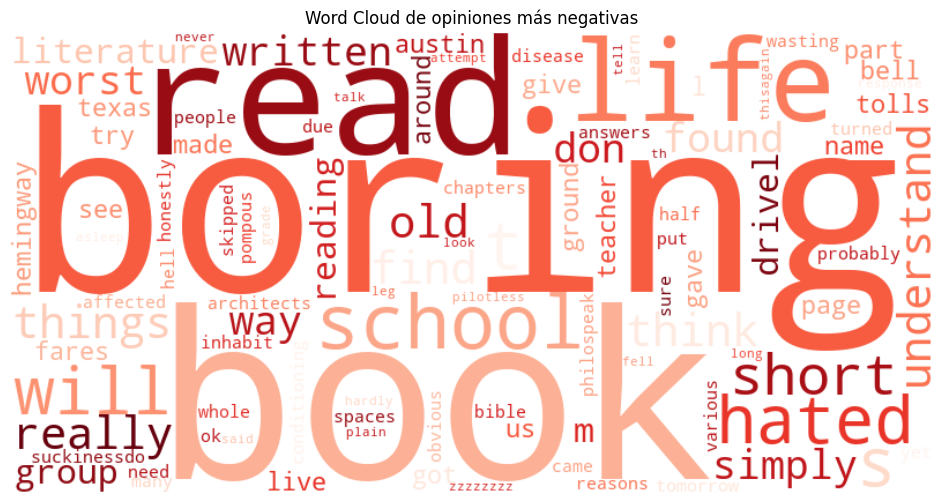

In [177]:
# unimos todo el texto de las opiniones muy negativas
text_negativo = " ".join(opiniones_muy_negativas["text"].tolist())

# wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Reds', max_words=100).generate(text_negativo)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de opiniones más negativas")
plt.show()

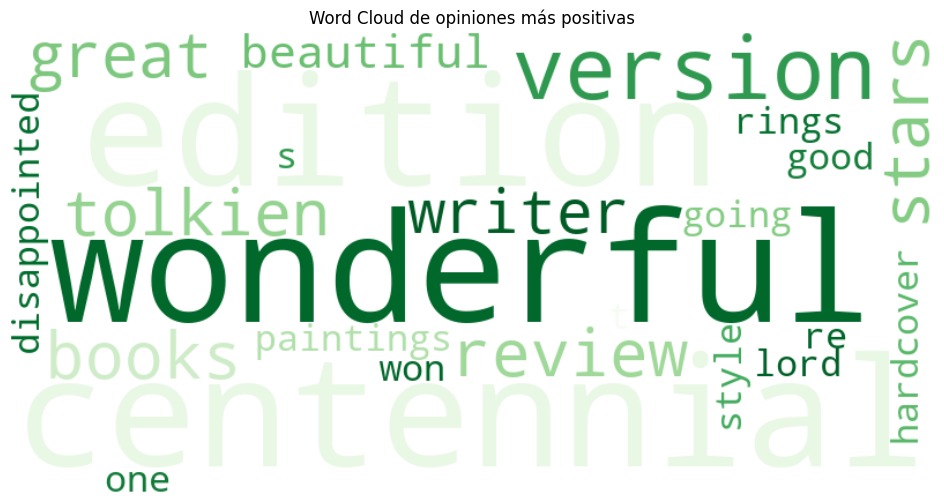

In [178]:
# opiniones con polaridad muy positiva
umbral_positivo = 2.5
opiniones_muy_positivas = opinions_with_neg_words[opinions_with_neg_words["afinn_score"] > umbral_positivo]

# unimos todo el texto
text_positivo = " ".join(opiniones_muy_positivas["text"].tolist())

# wordcloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white',
                          colormap='Greens', max_words=100).generate(text_positivo)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de opiniones más positivas")
plt.show()

# 5. Evaluación: comparación de modelos y discusión de resultados

### 5.1

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.1:</strong> Obtén los resultados de las métricas de evaluación del clasificador basado en regresión logística.

<b>Salida esperada: </b> Métricas de redimiento del modelo de regresión logística (por clase).
</div>

Clasification Report:
              precision    recall  f1-score   support

Negativa (0)       0.86      0.85      0.85       998
Positiva (1)       0.85      0.86      0.86       986

    accuracy                           0.86      1984
   macro avg       0.86      0.86      0.86      1984
weighted avg       0.86      0.86      0.86      1984


Accuracy: 0.8553


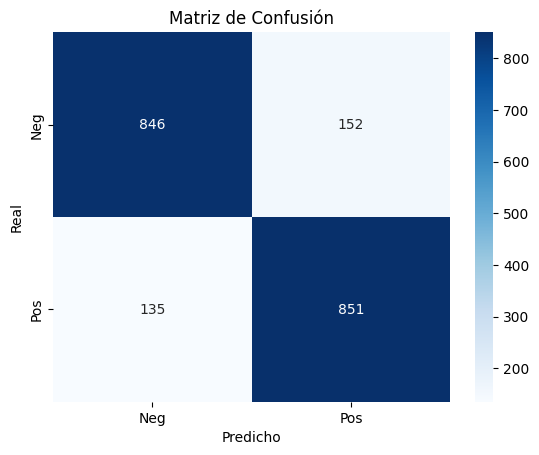

In [ ]:
#############################################
# SOLUCIÓN MODELO REGRESIÓN LOGÍSTICA       #
#############################################

# predecir
y_pred = clf.predict(X_test)

# métricas de evaluación
print("Clasification Report:")
print(classification_report(y_test, y_pred, target_names=["Negativa (0)", "Positiva (1)"]))

# accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Un accuracy del 85.5% y métricas similares entre clases (f1-score ≈ 0.85 para negativas y 0.86 para positivas), nos indican que el modelo es capaz de identificar correctamente tanto valoraciones negativas como positivas, sin mostrar sesgo hacia ninguna de ellas

### 5.2

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.2:</strong> Obtener también los resultados de las métricas de evaluación para un clasificador diferente. Por ejemplo, utilizar SVM.
<br>
<b>Salida esperada: </b>
<br>
- Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
<br>
- Métricas de redimiento del modelo SVM (por clase).
<br>
</div>

Tiempo de entrenamiento (SVM): 0.0366 segundos

Clasification Report (SVM):
              precision    recall  f1-score   support

Negativa (0)       0.85      0.84      0.85       998
Positiva (1)       0.84      0.85      0.85       986

    accuracy                           0.85      1984
   macro avg       0.85      0.85      0.85      1984
weighted avg       0.85      0.85      0.85      1984

Accuracy (SVM): 0.8463


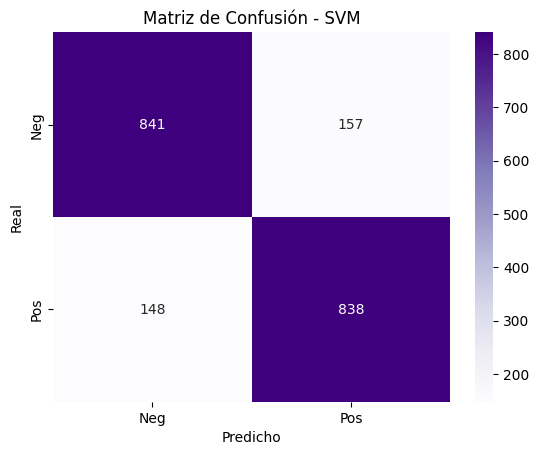

In [183]:
#############################################
# SOLUCIÓN MODELO SVM                       #
#############################################

# modelo
svm_model = LinearSVC()

# tiempo de entrenamiento
start = time.time()
svm_model.fit(X_train, y_train)
end = time.time()

print(f"Tiempo de entrenamiento (SVM): {end - start:.4f} segundos")

# predecir en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# métricas
print("\nClasification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Negativa (0)", "Positiva (1)"]))

# accuracy
print(f"Accuracy (SVM): {accuracy_score(y_test, y_pred_svm):.4f}")

# matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()


Un accuracy del 84.6% y métricas similares entre clases, nos indican nuevamente que el modelo es capaz de identificar correctamente tanto valoraciones negativas como positivas, sin mostrar sesgo hacia ninguna de ellas.

Adicionalmente podemos probar con Naive Bayes a ver si las metricas varían en algún sentido 

Tiempo de entrenamiento (Naive Bayes): 0.0025 segundos

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

Negativa (0)       0.86      0.87      0.86       998
Positiva (1)       0.86      0.85      0.86       986

    accuracy                           0.86      1984
   macro avg       0.86      0.86      0.86      1984
weighted avg       0.86      0.86      0.86      1984

Accuracy (Naive Bayes): 0.8599


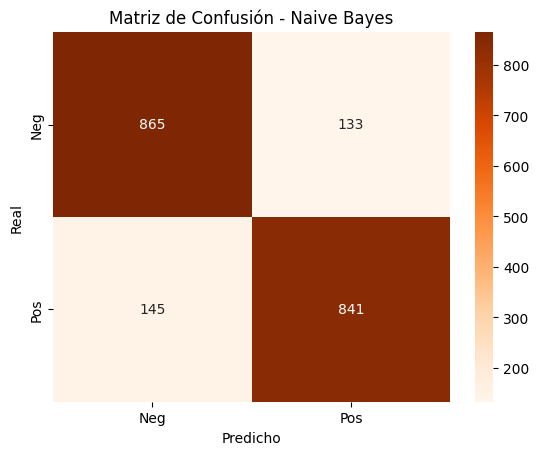

In [ ]:


#############################################
# MODELO NAIVE BAYES - MultinomialNB
#############################################

# modelo
nb_model = MultinomialNB()

# tiempo de entrenamiento
start = time.time()
nb_model.fit(X_train, y_train)
end = time.time()

# 3. Mostrar tiempo
print(f"Tiempo de entrenamiento (Naive Bayes): {end - start:.4f} segundos")

# predecir en el conjunto de test
y_pred_nb = nb_model.predict(X_test)

# métricas
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=["Negativa (0)", "Positiva (1)"]))

# accuracy
print(f"Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred_nb):.4f}")

# matriz de confusión
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


Como se puede observar se mantiene el rendimiento que tenían los modelos anteriores